<b>Проект</b>: Сегментация покупателей интернет-магазина товаров для дома и быта по профилю потребления для планирования рекламных компаний.

<b>Задача</b>: Сегментировать покупателей по профилю потребления и разработать рекомендаций заказчику для осуществления рекламных рассылок.

<b>План проекта</b>:

1  Загрузить и изучить данные  
2  Провести предобработку данных (проверить на пропуски, дубликаты, формат данных, соответствие названия столбцов принятому стилю, добавить необходимые столбцы).  
3  Провести исследовательский анализ данных:  
3.1  Провести общий анализ данных:  
- проанализировать количество заказов, совершаемых пользователями,  
- проанализировать сумму заказов, совершаемых пользователями,  
- определить и проанализировать интервал времени, в течение которого совершаются повторные покупки,  
- проанализировать изменение выручки по месяцам на предмет сезонности.  
3.2  Разбить товары на категории.  
3.3  Сегментировать покупателей на группы и провести анализ групп.  
Сегментировать покупателей на группы с использованием RFM – анализа по давности последней покупки, частоте покупок и сумме заказа.  
Для каждого сегмента определить, какие группы товаров в нем популярны. Проверить влияние фактора сезонности на покупки.  
4  Сформулировать и проверить гипотезы.  
4.1  Проверить гипотезу о наличии статистически значимой разницы  в размера средней выручки за весь период на 1 клиента по сегментам. (Нулевая гипотеза: статистической значимой разницы между значениями средней выручки на 1 клиента между сегментами нет, альтернативная гипотеза: статистически значимая разница между значениями средней выручки на 1 клиента между сегментами есть).  
4.2  Проверка гипотезы о наличии статистически значимой разницы в размере среднего чека заказа по сегментам. (Нулевая гипотеза: статистической значимой разницы между значениями среднего чека заказа между сегментами нет, альтернативная гипотеза: статистически значимая разница между значениями среднего чека заказа между сегментами есть).  
5  Сформулировать основные выводы и рекомендации для проведения рекламной кампании в разрезе каждого сегмента покупателей.¶



<b>Описание данных для проекта и структуры проекта</b>:

Имеются данные о покупках пользователей интернет-магазина товаров для дома и быта с 01.10.2018г. по 31.01.2020г.(за 1г.3мес.).

На основе этих данных, после их предобработки, планируется проанализировать общую картину покупок пользователей в разрезе суммы покупки, количества покупок и временного интервала покупок.  
После этого будет произведено сегментирование данных с помощью RFM-анализа и их анализ для определения сегментов, потенциально выгодных для осуществления рекламной рассылки. Т.е. определено, в каком сегменте покупатели покупают часто, много и дорогой товар, а на какой сегмент, возможно, не стоит тратить время и деньги на рекламную рассылку. Клиентам какого сегмента, когда и какие категории товара предлагать в рекламных рассылках. Как и для какого сегмента можно попытаться увеличить количество заказов/товаров и повысить возвращаемость покупателей и т.д.  
После сегментации клиентов проверить корректность разделения на сегменты с помощью статистических гипотез о наличии статистической значимой разницы между сегментами. В конце сформулировать итоговые выводы и рекомендации для заказчика в целях проведения им рекламной кампании.  

# Загрузка и изучение данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

Загрузим и изучим данные.

In [3]:
display(data.head(5))
print('-'* 25)
display(data.info())
print('-'* 25)
display(data.isna().mean())
print('-'* 25)
display(data['date'].min())
display(data['date'].max())

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


None

-------------------------


date           0.0
customer_id    0.0
order_id       0.0
product        0.0
quantity       0.0
price          0.0
dtype: float64

-------------------------


2018100100

2020013115

Предоставлен датасет 7474 строк с данными о покупках пользователей за период c 01.10.2018г. по 31.01.2020г.  

Данные содержат информацию о: дате(date), id пользователя(customer_id), id заказа(order_id), наименовании продукта(product), количестве единиц товара(quantity), цене товара(price).  



# Предобработка данных.

Проведем предобработку данных.

Приведем столбец с датой к формату datetime64. В остальных столбцах формат данных соответствует необходимому.

In [4]:
data['date'] = pd.to_datetime(data['date'],format='%Y%m%d%H')

Проверим данные на дубликаты.

In [5]:
data.duplicated().sum()

0

Явные дубликаты не обнаружены. Проверим дубликаты без учета данных столбца "date".

In [6]:
data[['customer_id','order_id','product','quantity','price']].duplicated().sum()


1864

Без учета данных столбца "date"  в данных присутствует 1864 дубликата. Скорее всего дубликаты могли появиться в связи с выгрузкой данных из разных баз и не совсем корректного их объединения(т.е., в разных базах могла быть разная информация о времени, например, о времени формирования, обработки, отгрузки, получения заказа, и эта информация могла быть не учтена при объединении баз).  

Удалим данные дубликаты.

In [7]:
data = data.drop_duplicates(subset=['customer_id','order_id','product','quantity','price']).reset_index(drop=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5610 non-null   datetime64[ns]
 1   customer_id  5610 non-null   object        
 2   order_id     5610 non-null   int64         
 3   product      5610 non-null   object        
 4   quantity     5610 non-null   int64         
 5   price        5610 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 263.1+ KB


Т.о., осталось 5610 строк для анализа.

Посмотрим минимальные и максимальные значения по оставшимся данным.

In [9]:
data.describe()

,date,order_id,quantity,price
count,5610,5610.000000,5610.000000,5610.000000
mean,2019-05-05 02:51:49.732620288,55982.134403,2.608556,530.084507
min,2018-10-01 00:00:00,12624.000000,1.000000,9.000000
25%,2019-01-29 19:30:00,14815.000000,1.000000,90.000000
50%,2019-04-28 17:00:00,69225.500000,1.000000,150.000000
75%,2019-07-28 09:00:00,71927.500000,1.000000,524.000000
max,2020-01-31 15:00:00,112789.000000,1000.000000,14917.000000
std,NaN,32373.436923,16.420261,971.758307


Т.о., временной период, за который будет вестись анализ: с 01.10.2018г. по 31.01.2020г.(1г.3мес.)  
Максимальное количество единиц заказываемого товара - 1000 при медианном значении 1, поэтому следует в дальнейшем проверить данные на выбросы или на наличие оптовиков среди покупателей. 

Посмотрим данные на наличие некорректных значений в столбцах.

In [10]:
list_c = ['customer_id','order_id','product','quantity','price']
for col_i in list_c:
  print('-'* 25)
  print(col_i, data[col_i].sort_values().unique())

-------------------------
customer_id ['000d6849-084e-4d9f-ac03-37174eaf60c4'
 '001cee7f-0b29-4716-b202-0042213ab038'
 '00299f34-5385-4d13-9aea-c80b81658e1b' ...
 'ffb5976a-7a4d-460b-95c4-5ffaba31cb24'
 'ffb80538-3fda-4351-8ea9-9d2bec58bb07'
 'ffe82299-3f5b-4214-87fe-3d36ecccfac3']
-------------------------
order_id [ 12624  13547  14480 ... 112767 112779 112789]
-------------------------
product ['Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759'
 'Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776'
 'Tepмокружка AVEX Recharge 500 мл голубой AVEX0681' ...
 'томата (помидор) Южный вечер № 120 сорт детерминантный среднеспелый черный'
 'томата (помидор) Юсуповский Узбекский №86 сорт индетерминантный позднеспелый красный'
 'томата (помидор) сорт Бычье Сердце №14']
-------------------------
quantity [   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   20   22   23   24   25   26   27   29   30   31
   37   40   43   45   50   57   59   60   64   65   

Некорректных данных не обнаружено.  
Наименования в столбце product не имеют признаков классификации по категориям, поэтому в дальнейшем необходимо вручную провести классификацию товаров на группы.

Добавим столбец total_price со стоимостью заказа.

In [11]:
data['total_price'] = data['price']*data['quantity']

Добавим столбец month с датой платежа.

In [12]:
data['month']=data['date'].dt.to_period("M")

Проверим данные на наличие заказов совершенных более чем одним покупателем.

In [13]:
data_ord_count_cust = data.groupby('order_id',as_index=False).agg({'customer_id':'nunique'})
data_ord_count_cust['customer_id'].unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
mult_customer_id_in_order = data_ord_count_cust[data_ord_count_cust['customer_id'] > 1]['order_id'].unique()
len(mult_customer_id_in_order)

29

In [15]:
data['order_id'].nunique()

3521

In [16]:
data.query('order_id in @mult_customer_id_in_order').sort_values(by='order_id')

,date,customer_id,order_id,product,quantity,price,total_price,month
3860,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,Однолетнее растение Петуния махровая в кассете...,2,82.0,164.0,2019-06
3862,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,Петуния махровая рассада однолетних цветов в к...,1,128.0,128.0,2019-06
3864,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,Однолетнее растение Петуния махровая в кассете...,2,82.0,164.0,2019-06
3865,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,Однолетнее растение Петуния простая в кассете ...,1,82.0,82.0,2019-06
3866,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,Петуния махровая рассада однолетних цветов в к...,1,128.0,128.0,2019-06
...,...,...,...,...,...,...,...,...
4675,2019-10-03 15:00:00,0309d37c-ab5f-4793-ba72-5484c019b840,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2360.0,2019-10
4677,2019-10-04 08:00:00,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2360.0,2019-10
4703,2019-10-07 20:00:00,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2360.0,2019-10
4757,2019-10-13 15:00:00,b1dbc7c4-3c84-40a7-80c9-46e2f79d24ad,72950,Кастрюля эмалированная Стэма С-1624 12 л цилин...,1,974.0,974.0,2019-10


Найдено 29 заказов, совершенных более, чем одним пользователем(от 2 до 4). Товары в заказе от разных пользователей совпадают.
Это незначительное количество заказов в общем объеме заказов(менее 1%), не влияющее на анализ, поэтому удалим их, т.к. не знаем причину такого дублирования.

In [17]:
data = data.query('order_id not in @mult_customer_id_in_order')
data['date'].count()

5544

Осталось 5544 строк для анализа.

# Исследовательский анализ данных.

## Общий анализ данных.

### Проанализируем общую сумму заказов, совершаемых пользователями, учитывая показатель количества заказываемых единиц товара и наименований товара.
Для этого сгруппируем данные по заказам. Найдем суммарное значение выручки, общее количество единиц и позиций товаров в заказе. 

In [18]:
data_order_id = data.groupby('order_id',as_index=False).agg({'total_price':'sum','date':'min','customer_id':'first','product':'nunique','quantity':'sum'}).sort_values(by='total_price',ascending=False)
data_order_id.head(5) 

,order_id,total_price,date,customer_id,product,quantity
2021,71743,675000.0,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,1,1000
1984,71668,49432.0,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,1,334
1057,69830,47385.0,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,1,27
720,69156,33680.0,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,6,101
910,69504,32718.0,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,1,57


Оценим разброс значений суммы заказа, количества заказываемых товаров и наименований товара в одном заказе, в т.ч. выбросы.

In [19]:
data.groupby('order_id').agg({'total_price':'sum','product':'nunique','quantity':'sum'}).describe()

,total_price,product,quantity
count,3492.000000,3492.000000,3492.000000
mean,1317.663063,1.581329,4.099084
std,11593.250390,2.513550,21.375714
min,9.000000,1.000000,1.000000
25%,194.000000,1.000000,1.000000
50%,584.000000,1.000000,1.000000
75%,1271.750000,1.000000,2.000000
max,675000.000000,51.000000,1000.000000


Для оценки распределения значений и выбросов построим диаграмму размаха.

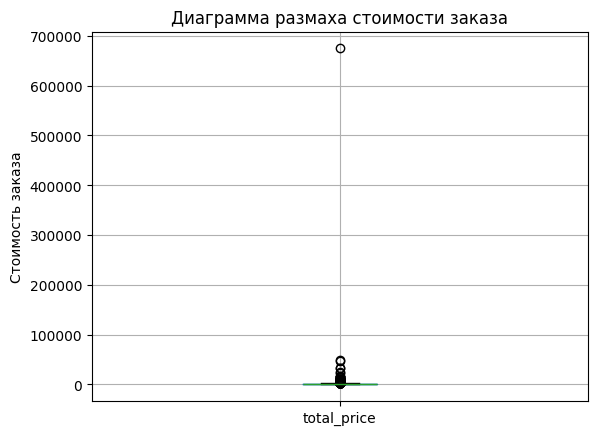

In [20]:
data.groupby('order_id').agg({'total_price':'sum'}).boxplot()
plt.title('Диаграмма размаха стоимости заказа')
plt.ylabel('Стоимость заказа')
plt.show()

Из таблиц и графика видно, что в данных присутствуют сильные выбросы. Сильно выделяется заказ на 675 000,он же является максимальным по количеству единиц товара в заказе(1000шт.). Удалим его, чтобы не искажать картину анализа.

In [21]:
data = data.query('total_price < 675000')

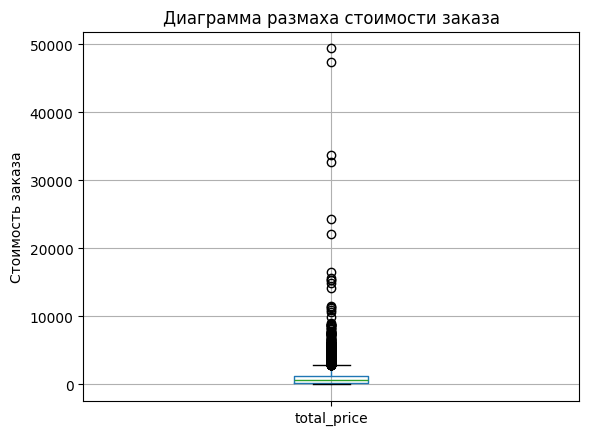

In [22]:
data.groupby('order_id').agg({'total_price':'sum'}).boxplot()
plt.title('Диаграмма размаха стоимости заказа')
plt.ylabel('Стоимость заказа')
plt.show()

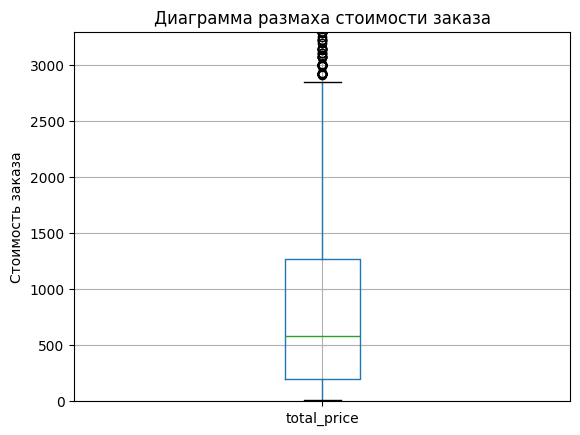

In [23]:
data.groupby('order_id').agg({'total_price':'sum'}).boxplot()
plt.ylim(0,3300)
plt.title('Диаграмма размаха стоимости заказа')
plt.ylabel('Стоимость заказа')
plt.show()

Выбросами по стоимости заказа можно считать суммы свыше 3300р. и до 50000р.

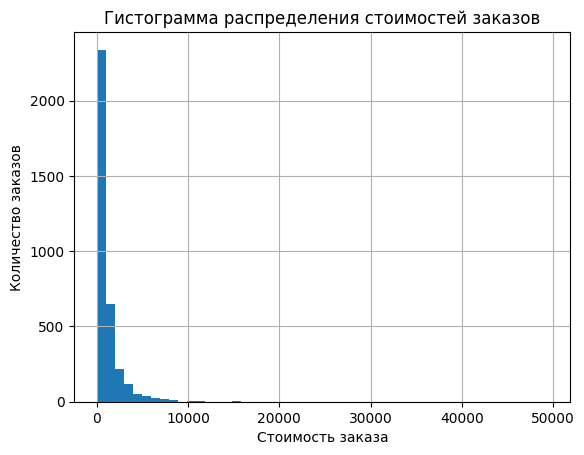

In [24]:
data.groupby('order_id').agg({'total_price':'sum'}).hist(bins=50)
plt.title('Гистограмма распределения стоимостей заказов')
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество заказов')
plt.show()

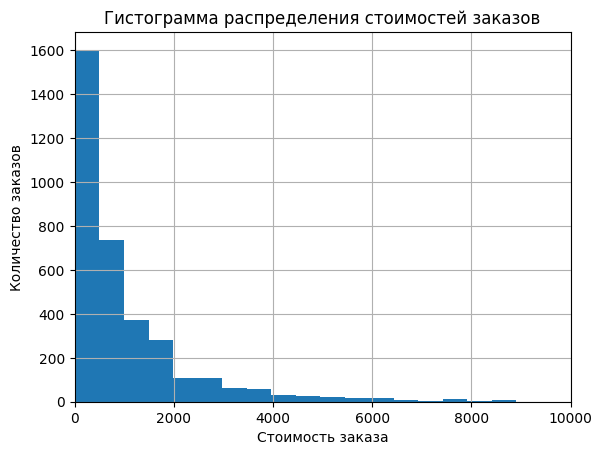

In [25]:
data.groupby('order_id').agg({'total_price':'sum'}).hist(bins=100)
plt.title('Гистограмма распределения стоимостей заказов')
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество заказов')
plt.xlim(0,10000)
plt.show()

In [26]:
data.groupby('order_id').agg({'total_price':'sum'}).quantile(0.93)

total_price    3298.0
Name: 0.93, dtype: float64

По гистограмме видно, что большинство заказов составляют до 500р., почти в 2 раза меньше - до 1000р., свыше 3300 идут уже единичные заказы ,которые составляют 7% от общего количества заказов.

Аналогично проанализируем количество единиц в 1 заказе.

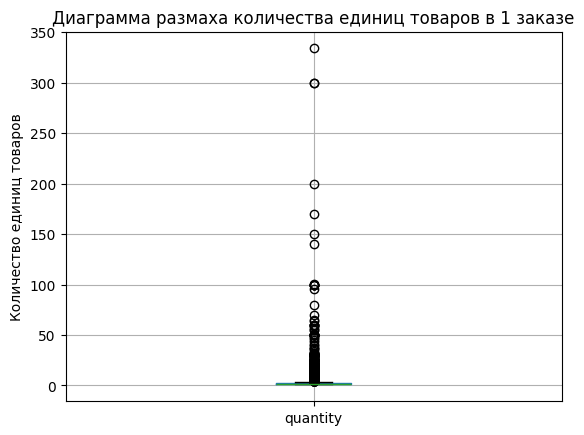

In [27]:
data.groupby('order_id').agg({'quantity':'sum'}).boxplot()
plt.title('Диаграмма размаха количества единиц товаров в 1 заказе')
plt.ylabel('Количество единиц товаров')
plt.show()


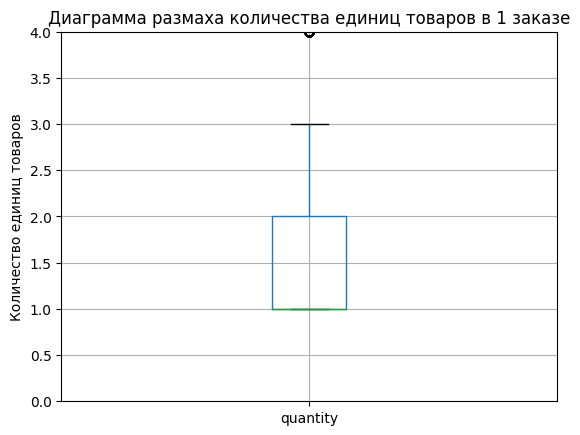

In [28]:
data.groupby('order_id').agg({'quantity':'sum'}).boxplot()
plt.title('Диаграмма размаха количества единиц товаров в 1 заказе')
plt.ylabel('Количество единиц товаров')
plt.ylim(0,4)
plt.show()

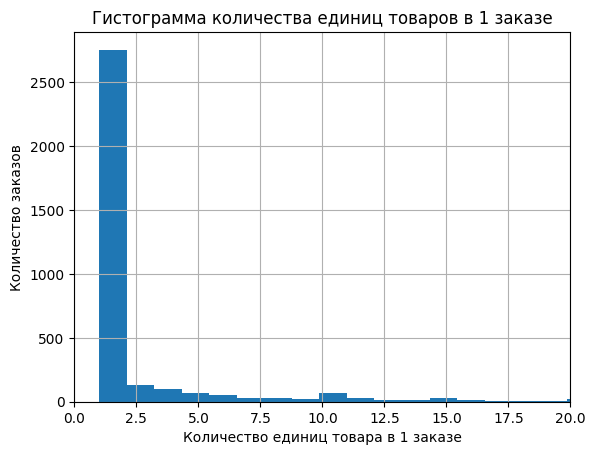

In [29]:
data.groupby('order_id').agg({'quantity':'sum'}).hist(bins=300)
plt.title('Гистограмма количества единиц товаров в 1 заказе')
plt.xlabel('Количество единиц товара в 1 заказе')
plt.ylabel('Количество заказов')
plt.xlim(0,20)
plt.show()

In [30]:
data.groupby('order_id').agg({'quantity':'sum'}).quantile(0.78)

quantity    2.0
Name: 0.78, dtype: float64

По графикам видно, что 78% покупателей заказывают не более 2 товаров в 1 заказе.  
При этом есть выбросы до 334 товаров в 1 заказе.

Проанализируем количество наименований товаров в 1 заказе.

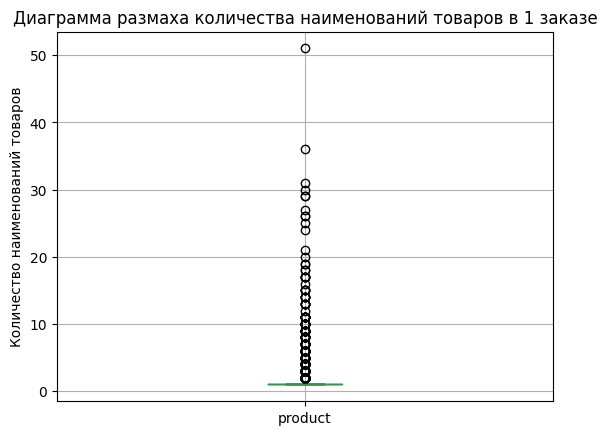

In [31]:
data.groupby('order_id').agg({'product':'nunique'}).boxplot()
plt.title('Диаграмма размаха количества наименований товаров в 1 заказе')
plt.ylabel('Количество наименований товаров')
plt.show()

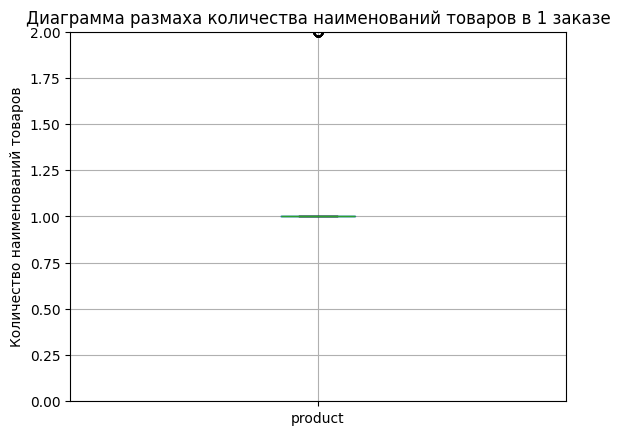

In [32]:
data.groupby('order_id').agg({'product':'nunique'}).boxplot()
plt.title('Диаграмма размаха количества наименований товаров в 1 заказе')
plt.ylabel('Количество наименований товаров')
plt.ylim(0,2)
plt.show()

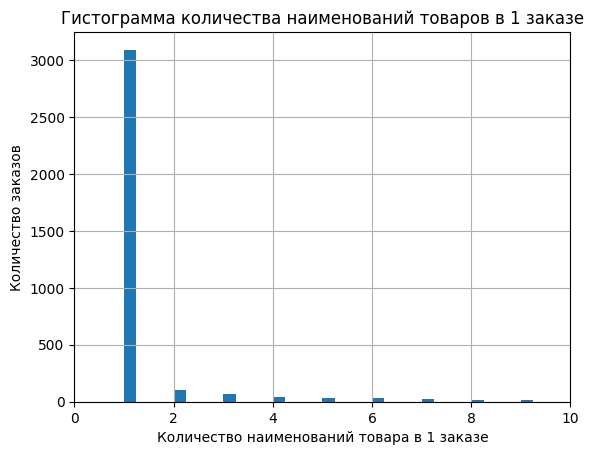

In [33]:
data.groupby('order_id').agg({'product':'nunique'}).hist(bins=200)
plt.title('Гистограмма количества наименований товаров в 1 заказе')
plt.xlabel('Количество наименований товара в 1 заказе')
plt.ylabel('Количество заказов')
plt.xlim(0,10)
plt.show()

In [34]:
data.groupby('order_id').agg({'product':'nunique'}).quantile(0.88)

product    1.0
Name: 0.88, dtype: float64

По графикам видно, что 88% покупателей заказывают не более 1 наименования товара в 1 заказе.
При этом есть выбросы до510наименования  товаров в 1 заказе.

In [35]:
data.groupby('order_id').agg({'total_price':'sum','product':'nunique','quantity':'sum'}).describe()

,total_price,product,quantity
count,3491.000000,3491.000000,3491.000000
mean,1124.686169,1.581495,3.813807
std,2088.621360,2.513891,13.144654
min,9.000000,1.000000,1.000000
25%,194.000000,1.000000,1.000000
50%,584.000000,1.000000,1.000000
75%,1268.500000,1.000000,2.000000
max,49432.000000,51.000000,334.000000


Т.о., большинство пользователей совершают заказы на сумму не более 3300р., заказывают не более 3 товарных единиц и 1 товарного наименования в 1 заказе.  
Медианное значение суммы заказа составляет 590р., 3 квантиль - 1274р., стандартное отклонение - 2090р., при этом максимальное значение за счет выбросов- 49 432р.  
Медианное значение количества наименований заказываемых товаров составляет 1 шт., 3 квантиль - 1 шт., стандартное отклонение - 2.5, при этом максимальное значение за счет выбросов- 51шт.  
Медианное значение количества заказываемых единиц товаров составляет 1 шт., 3 квантиль - 2 шт., стандартное отклонение - 13.4, при этом максимальное значение за счет выбросов- 334шт.  

Но, несмотря на такие сильные выбросы, удалять их не будем, т.к. в дальнейшем планируется сегментация покупателей. Можно предположить, что данные выбросы  как раз представляют собой отдельную группу покупателей-оптовиков (т.к. покупают в основном однородные товары на большую сумму), к которым нужен свой подход со стороны маркетинга. Данная группа будет небольшой по количеству покупателей, но приносящей хороший доход при стимуляции их к повторным заказам.


На основе проведенного выше анализа, создадим также список customer_id клиентов, которые могут буть отнесены к категории оптовиков. Сумму заказа устанивим более 7000, а количество единиц товара в заказе - более 10.

In [36]:
customer_id_wholesale = data_order_id.query('total_price > 7000 and quantity>10')['customer_id'].unique()
customer_id_wholesale

array(['312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6',
       '146cd9bf-a95c-4afb-915b-5f6684b17444',
       '58a4c3cc-504f-43ea-a74a-bae19e665552',
       '8fba3604-ef57-4b9f-b2fe-3402fa8825c8',
       '6987e6d6-a63a-4ce2-a2d0-f424092d235e',
       '9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f',
       '5d189e88-d4d6-4eac-ab43-fa65a3c4d106',
       '498f12a4-6a62-4725-8516-cf5dc9ab8a3a',
       '6be74251-7159-4cc0-99fb-d034a17c61b0',
       'af4d270b-c7ae-4af5-9582-4e61ff08eff0',
       'd35ce92b-08ec-46a5-87c5-2ef42c65ed3e',
       '7d8528bb-623e-477f-a059-efc312b62d29',
       '4d93d3f6-8b24-403b-a74b-f5173e40d7db',
       'aa42dc38-780f-4b50-9a65-83b6fa64e766',
       'cd09ea73-d9ce-48c3-b4c5-018113735e80',
       '0c5aaa88-e346-4f87-8f7a-ad8cbc04e965',
       '6ae61023-9d87-4ff3-a02e-b42eab150140',
       '9151d307-654c-4239-a888-ada5ca45f0b2'], dtype=object)

In [37]:
len(customer_id_wholesale)

18

18 клиентов попало в данную категорию

### Проанализируем количество заказов, совершаеммых пользователями.

In [38]:
data.groupby(['customer_id'],as_index=False).agg({'total_price':'sum','order_id':'nunique'}).sort_values(by='order_id',ascending=False)

,customer_id,total_price,order_id
1884,c971fb21-d54c-4134-938f-16b62ee86d3b,159508.0,126
729,4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278.0,35
1079,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,21361.0,17
1718,b7b865ab-0735-407f-8d0c-31f74d2806cc,3779.0,7
17,0184f535-b60a-4914-a982-231e3f615206,5891.0,5
...,...,...,...
976,69cf691b-a6c2-4543-aa8a-8cf42fe4a76e,3525.0,1
975,69c524f1-dd2a-4c4e-a5b0-def54dc96f9e,149.0,1
974,69b17a52-a59b-4656-8d47-375e81e7d5f1,1574.0,1
973,69897438-1f6c-42f3-8876-ec7f0296072d,1799.0,1


In [39]:
data[data['customer_id']=='c971fb21-d54c-4134-938f-16b62ee86d3b']

,date,customer_id,order_id,product,quantity,price,total_price,month
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0,674.0,2018-10
20,2018-10-02 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,Чехол для гладильной доски Festival 137x60 см ...,1,1162.0,1162.0,2018-10
60,2018-10-03 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,Набор прищепок большие пластиковые ROZENBAL ПИ...,10,86.0,860.0,2018-10
61,2018-10-03 10:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,Сушилка для белья Attribute ПРИМА 11 м синяя н...,1,749.0,749.0,2018-10
124,2018-10-08 07:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,Тележка багажная DELTA ТБР-20 коричневый с ора...,1,742.0,742.0,2018-10
...,...,...,...,...,...,...,...,...
1870,2019-03-04 15:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70582,Нефролепис Бостон d-12 см,1,292.0,292.0,2019-03
1872,2019-03-04 16:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70589,Калла крупноцветковая желтая,1,374.0,374.0,2019-03
1888,2019-03-05 13:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70606,Пеларгония розебудная Red Pandora укорененный ...,1,134.0,134.0,2019-03
1892,2019-03-05 15:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70614,Гладильная доска НИКА LORA FASHION HLF 123х46 см,1,1949.0,1949.0,2019-03


In [40]:
data[data['customer_id']=='4d93d3f6-8b24-403b-a74b-f5173e40d7db']

,date,customer_id,order_id,product,quantity,price,total_price,month
12,2018-10-01 13:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,Чехол Eurogold Clean Basic хлопок для досок 12...,1,187.0,187.0,2018-10
21,2018-10-02 10:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68491,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1049.0,1049.0,2018-10
42,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 3-х рядная деревянная 450 мм (пло...,15,49.0,735.0,2018-10
43,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 4-х рядная деревянная 300 мм (фиг...,15,70.0,1050.0,2018-10
46,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Вилка столовая RIPPLE сталь 3 мм, 3 шт, Attrib...",1,187.0,187.0,2018-10
47,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Ложка столовая RIPPLE сталь 3 мм, 3 шт, Attrib...",1,202.0,202.0,2018-10
48,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Ложка чайная RIPPLE сталь 2,5 мм, 3 шт, Attrib...",1,142.0,142.0,2018-10
49,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Нож столовый RIPPLE 80 г 2 шт, Attribute, ACR042",1,172.0,172.0,2018-10
50,2018-10-02 15:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68506,Герань домашняя (пеларгония зональная) цветуща...,11,142.0,1562.0,2018-10
66,2018-10-03 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68516,Сушилка для белья потолочно-настенная Gimi Lif...,1,1649.0,1649.0,2018-10


In [41]:
data[data['customer_id']=='73d1cd35-5e5f-4629-8cf2-3fda829d4e58']

,date,customer_id,order_id,product,quantity,price,total_price,month
4671,2019-10-02 15:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72836,Чайник электрический ВАСИЛИСА Т31-2000 нержаве...,1,704.0,704.0,2019-10
4698,2019-10-07 09:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72881,Хризантема сиреневая d-18 см,1,187.0,187.0,2019-10
4699,2019-10-07 10:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72883,"Кипятильник электрический 2.5 КВт, 1601143",1,224.0,224.0,2019-10
4702,2019-10-07 16:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72889,Чайник электрический ВАСИЛИСА Т28-1800 нержаве...,1,749.0,749.0,2019-10
4727,2019-10-10 10:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72913,Стремянка COLOMBO FACTOTUM 4 ступени стальная ...,1,2849.0,2849.0,2019-10
4766,2019-10-15 09:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72967,Тележка багажная DELTA DT-22 синий грузоподъем...,1,674.0,674.0,2019-10
4781,2019-10-16 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72983,Сумка-тележка хозяйственная GIMI Ideal синяя,1,1649.0,1649.0,2019-10
4782,2019-10-16 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72986,Сумка-тележка хозяйственная Rolser MNB012 azul...,1,6600.0,6600.0,2019-10
4787,2019-10-16 16:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72993,"Таз пластмассовый 30,0 л овальный ПЦ2913, 1404051",1,404.0,404.0,2019-10
4788,2019-10-16 17:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72996,Контейнер для мусора FLIP BIN CURVER 25 л граф...,1,824.0,824.0,2019-10


Обнаружены 3 клиента с аномальными значениями количества заказов, которые совершали регуляные заказы(иногда несколько заказов день).  
1 - в течение 5 месяцев(126 заказов) и 2- в течение месяца (35 и 17 заказов), а потом прекратили совершать заказы.   

Исключим их из анализа, чтобы не искажать результаты.  

Но заказчику, следует обратить на них внимание и выяснить, с чем была связана системность и возможно ли возобновить взаимодействие с этими клиентами либо это техническая ошибка при загрузке данных.

In [42]:
max_count_order =['73d1cd35-5e5f-4629-8cf2-3fda829d4e58','4d93d3f6-8b24-403b-a74b-f5173e40d7db','c971fb21-d54c-4134-938f-16b62ee86d3b']

In [43]:
data = data.query('customer_id not in @max_count_order')

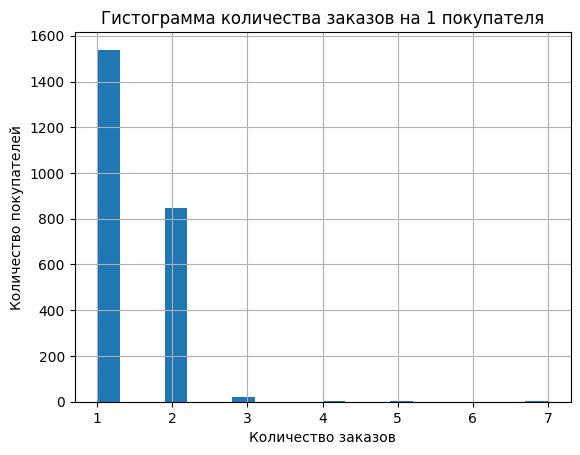

In [44]:
data.groupby(['customer_id']).agg({'order_id':'nunique'}).hist(bins=20)
plt.title('Гистограмма количества заказов на 1 покупателя')
plt.xlabel('Количество заказов')
plt.ylabel('Количество покупателей')
plt.show()

In [45]:
data.groupby(['customer_id'],as_index=False).agg({'order_id':'nunique'}).describe()

,order_id
count,2409.000000
mean,1.375259
std,0.525419
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


Практически все клиенты совершают не более 1-2 заказов(при этом число клиентов, совершивших 1 заказ, примерно в 2 раза больше, чем совершивших 2 заказа).  
Медианное значение количества заказов составляет 1 , 3 квантиль - 2 заказа. Максимальное количество заказов -7.

### Проанализируем интервал времени, в течение которого совершаются повторные покупки, а также период времени с момента последней покупки.

Проанализируем интервал времени, в течение которого совершаются повторные покупки.   

Добавим столбец time_interval с количеством дней между первой и последней покупкой.  

А также добавим столбец days_last_order с количеством дней с момента последней покупки.

In [46]:
data_time_interval = data.groupby(['customer_id'],as_index=False).agg({'order_id':'nunique','date':['min','max'],}).sort_values(by=('order_id','nunique'),ascending=False)

In [47]:
data_time_interval.columns = ['customer_id','count_order','min_date','max_date']

In [48]:
data_time_interval['time_interval'] = ((data_time_interval['max_date']-data_time_interval['min_date'])/ np.timedelta64 ( 1 , 'D')).apply(np.ceil)


In [49]:
data_time_interval['max_date'].max()

Timestamp('2020-01-31 15:00:00')

In [50]:
data_time_interval['days_last_order'] = ((data_time_interval['max_date'].max() - data_time_interval['max_date'])/ np.timedelta64 ( 1 , 'D')).apply(np.ceil)


Посмотрим на распределение количества покупателей, по количеству дней с момента их последней покупки.

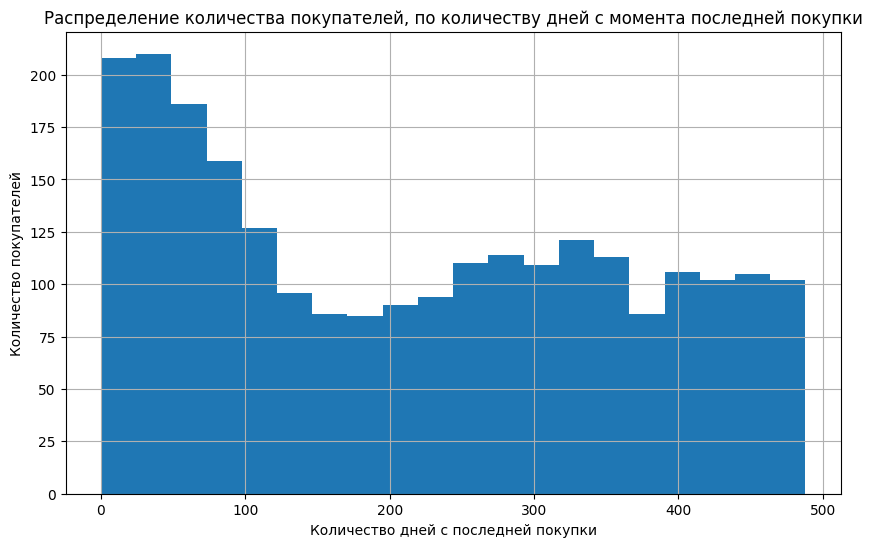

In [51]:
data_time_interval['days_last_order'].hist(bins=20,figsize=(10,6))
plt.title('Распределение количества покупателей, по количеству дней с момента последней покупки')
plt.xlabel('Количество дней с последней покупки')
plt.ylabel('Количество покупателей')
plt.show()

По графику видно, что активность покупателей магазина невысокая. Очень много клиентов, которые несколько месяцев не совершали покупки, вплоть до 1,3г. Начиная с 3-4 месяца с момента последней покупки их количество примерно одинаковое с увеличением срока давности.

Посмотрим, через какое время покупатели совершают повторные заказы.

In [52]:
data_time_interval[data_time_interval['count_order']==2]['count_order'].count()

845

In [53]:
data_time_interval[data_time_interval['count_order']>2]['count_order'].count()

25

Т.к. подавляющее число клиентов, совершивших повторные заказы, сделали только 2 заказа (845 человек), а больше 2 заказов - только 25, построим гистограмму распределения времени, через которое осуществляется повторный заказ  для клиентов с 2 заказами

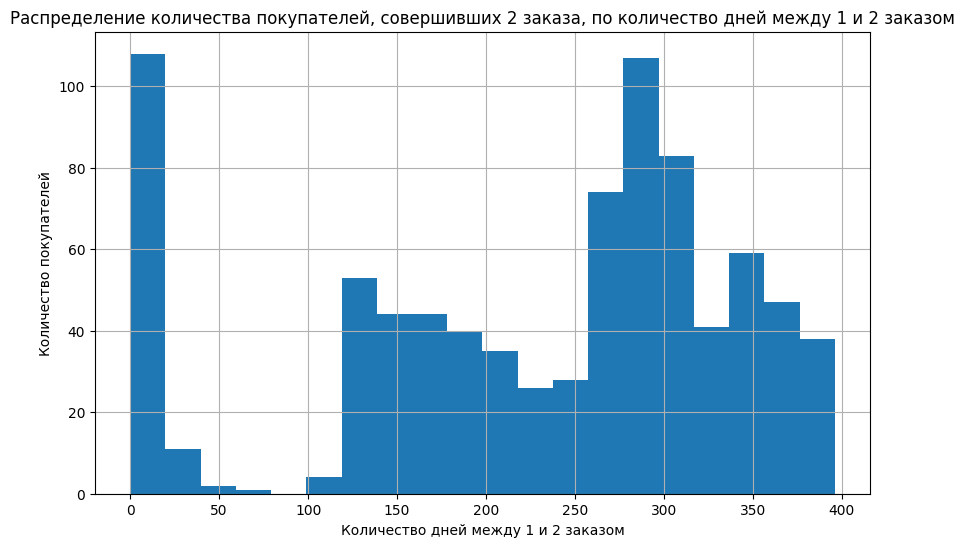

In [54]:
data_time_interval[data_time_interval['count_order']==2]['time_interval'].hist(bins=20,figsize=(10,6))
plt.title('Распределение количества покупателей, совершивших 2 заказа, по количество дней между 1 и 2 заказом')
plt.xlabel('Количество дней между 1 и 2 заказом')
plt.ylabel('Количество покупателей')
plt.show()

На графике выделяются 2 интервала, в течение которого покупатель совершает повторную покупку: в течение 2 недель и через 4-13 месяцев (с пиком в 9-11 месяцев, что может свидетельствовать о наличии влияния сезонности на повторные покупки или проведением специальных рекламным мероприятий в определенные даты). 

Посмотрим на распределение количества заказов по месяцам для клиентов, совершивших 2 покупки, а также распределение у этих клиентов по месяцам первых и повторных покупок.

In [55]:
customer_id_two_orders = data_time_interval[data_time_interval['count_order']==2]['customer_id'].unique()

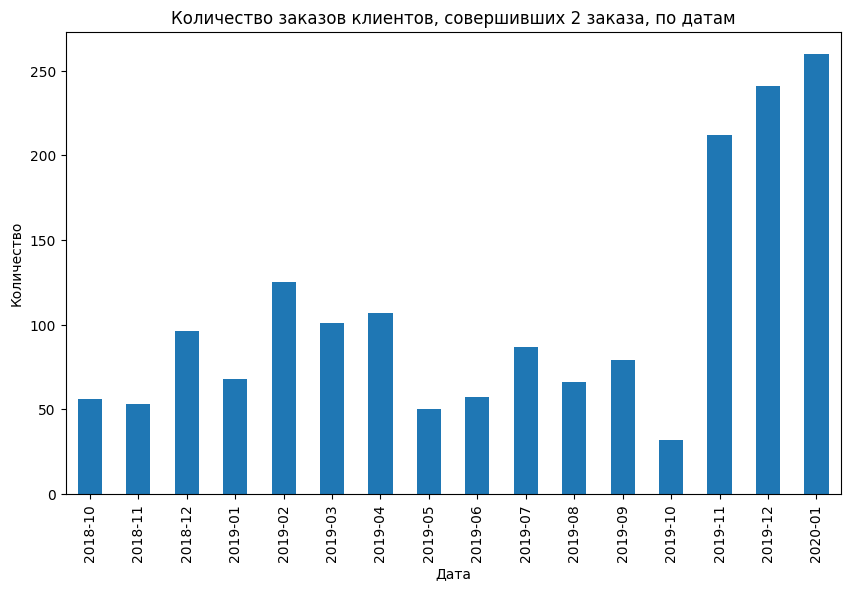

In [56]:
month_two_order = data.query('customer_id in @customer_id_two_orders').groupby('order_id',as_index=False).agg({'date':'min'})
month_two_order['month']=month_two_order['date'].dt.to_period("M")
month_two_order.groupby('month').agg({'order_id':'count'}).plot(kind='bar',figsize=(10,6),legend=False)
plt.title('Количество заказов клиентов, совершивших 2 заказа, по датам')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()

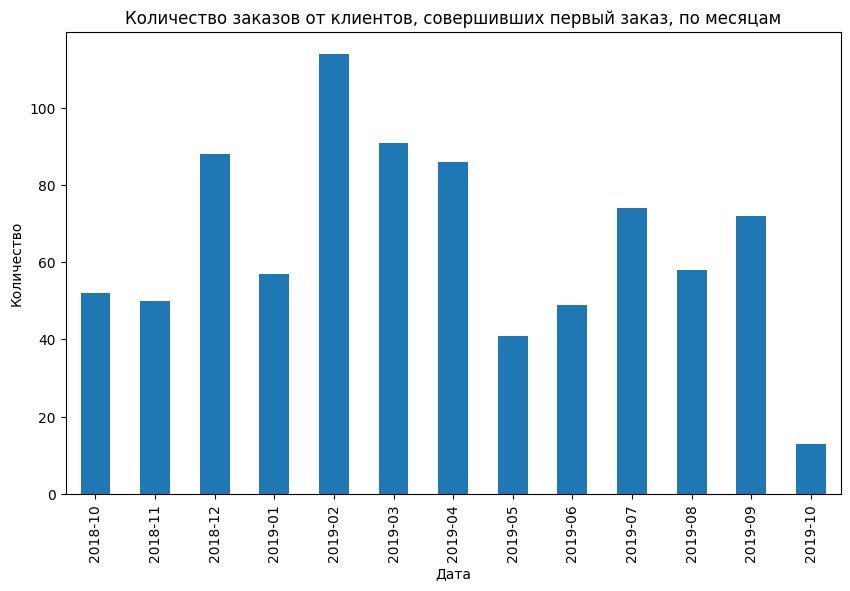

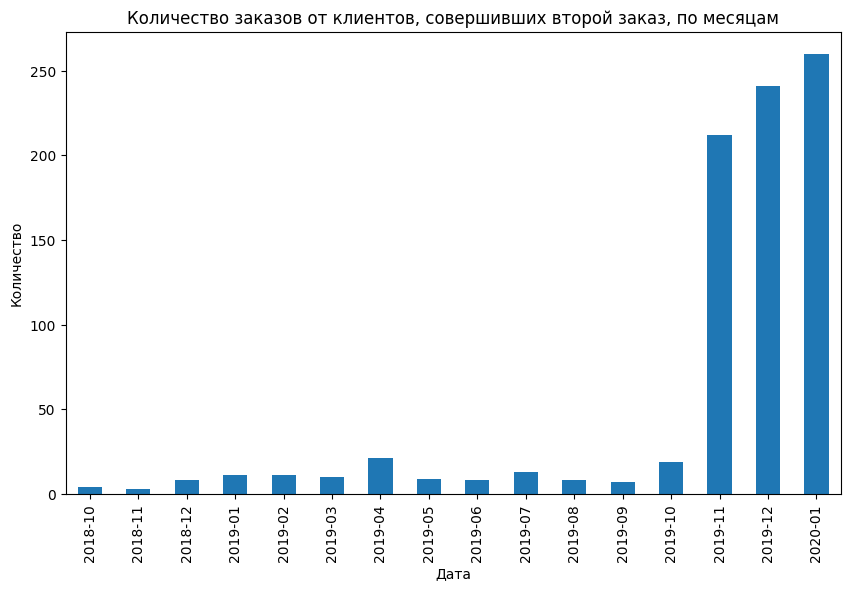

In [57]:
month_first_order = data.query('customer_id in @customer_id_two_orders').groupby('customer_id',as_index=False).agg({'date':'min'})
month_first_order['month']=month_first_order['date'].dt.to_period("M")
month_first_order.groupby('month').agg({'customer_id':'count'}).plot(kind='bar',figsize=(10,6),legend=False)
plt.title('Количество заказов от клиентов, совершивших первый заказ, по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.xticks(rotation=90)

month_secont_order = data.query('customer_id in @customer_id_two_orders').groupby('customer_id',as_index=False).agg({'date':'max'})
month_secont_order['month']=month_secont_order['date'].dt.to_period("M")
month_secont_order.groupby('month').agg({'customer_id':'count'}).plot(kind='bar',figsize=(10,6),legend=False)
plt.title('Количество заказов от клиентов, совершивших второй заказ, по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()

Т.о., клиенты, совершившие 2 покупки, первый заказ совершали чаще всего в 12.2018, 02.2019-04.2019, 07.2019 и 09.2019, а повторную покупку подавляющее большинство совершили в 11.2019-01.2020г. Это может быть связано с предновогодним и посленовогодним временем или проведением рекламных компаний в это время.

### Посмотрим общую динамику общей выручке и по количеству заказов по месяцам.

In [58]:
month_order = data.groupby('order_id',as_index=False).agg({'total_price':'sum','date':'min'})
month_order['month']=month_order['date'].dt.to_period("M")


In [59]:
month_order = month_order.groupby('month',as_index=False).agg({'order_id':'count','total_price':'sum'}).sort_values(by='month')
month_order['avg_total_price'] = month_order['total_price']/month_order['order_id']
month_order

,month,order_id,total_price,avg_total_price
0,2018-10,182,265645.000000,1459.587912
1,2018-11,184,334367.000000,1817.211957
2,2018-12,235,302456.000000,1287.046809
3,2019-01,159,225485.000000,1418.144654
4,2019-02,256,256718.000000,1002.804688
5,2019-03,234,243268.000000,1039.606838
6,2019-04,264,320067.000000,1212.375000
7,2019-05,178,237756.000000,1335.707865
8,2019-06,156,225116.000000,1443.051282
9,2019-07,198,235410.000000,1188.939394


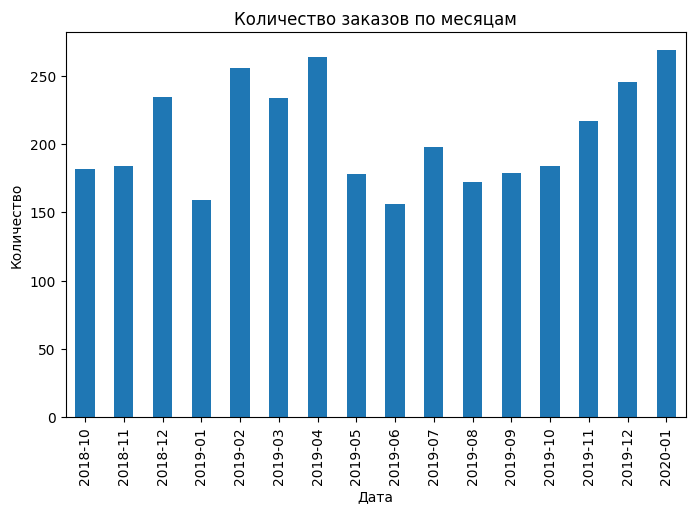

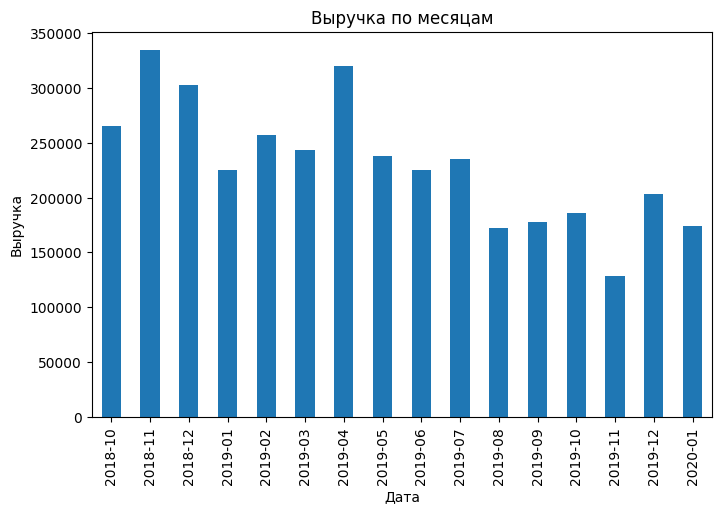

In [60]:
month_order.plot(x='month',y='order_id',kind='bar',figsize=(8,5),legend=False)
plt.title('Количество заказов по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.xticks(rotation=90)

month_order.plot(x='month',y='total_price',kind='bar',figsize=(8,5),legend=False)
plt.title('Выручка по месяцам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=90)
plt.show()

По наибольшему количеству заказов можно отметить периоды: 12.2018(235 заказов), 02.2019,04.2019(256,264 заказа) и 12.2019-01.2020(246,269 заказов).  
Если смотреть по выручке, то, несмотря на рост количества заказов в 12.2019-01.2020, выручка не растет, что говорит о падении среднего чека в этот период. Максимальная выручка в 11.2018-12.2018 (334,4 т.р.,302,5т.р.) и 04.2019 (320,1т.р.)

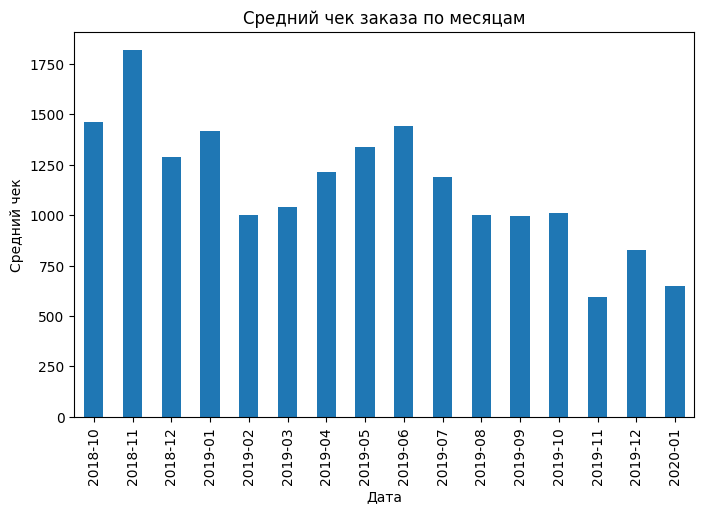

In [61]:
month_order.plot(x='month',y='avg_total_price',kind='bar',figsize=(8,5),legend=False)
plt.title('Средний чек заказа по месяцам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=90)
plt.show()

Максимальный средний чек заказа в 11.2018, также высокие средние чеки в 10.2018, 12.2018-01.2019, 05.2019-06.2019. Это может быть связано с крупными заказами в эти месяцы, которые мы определили ранее, как выбросы.

<b>Выводы:</b> Итак, в ходе общего анализа данных были проанализированы несколько параметров, для чего сформированы сводные таблицы, построены диаграммы размаха и гистограммы распределения (из сводных таблиц и графиков видно, что в данных присутствуют сильные выбросы):   

3.1.1	Общие суммы заказов, совершаемых пользователями с дополнительным анализом количества товаров и товарных наименований в заказе:  

3.1.1.1 Удален заказ на 675 000 с 1000 единицами товара в заказе.  
- Большинство заказов составляют до 500р., почти в 2 раза меньше - до 1000р., свыше 3300 идут уже единичные заказы, которые составляют 7% от общего количества заказов. Медианное значение суммы заказа составляет 590р., 3 квантиль - 1274р., стандартное отклонение - 2090р., при этом максимальное значение за счет выбросов- 49 432р.  

3.1.1.2	Количество товаров в одном заказе:  
 78% покупателей заказывают не более 2 товаров в 1 заказе. При этом есть выбросы до 334 товаров в 1 заказе. 
Медианное значение количества наименований заказываемых товаров составляет 1 шт., 3 квантиль - 1 шт., стандартное отклонение - 2.5, при этом максимальное значение за счет выбросов- 51шт.  

3.1.1.3	Количество товарных наименований в 1 заказе:  
88% покупателей заказывают не более 1 наименования товара в 1 заказе (есть выбросы до 510 наименований товаров в 1 заказе). 
Медианное значение количества заказываемых единиц товаров составляет 1 шт., 3 квантиль - 2 шт., стандартное отклонение - 13.4, при этом максимальное значение за счет выбросов- 334шт.  
Но, несмотря на сильные выбросы, они не были удалены, т.к. в дальнейшем планируется сегментация покупателей. Можно предположить, что данные выбросы как раз представляют собой отдельную группу покупателей-оптовиков (т.к. покупают в основном однородные товары на большую сумму), к которым нужен свой подход со стороны маркетинга. Данная группа будет небольшой по количеству покупателей, но приносящей хороший доход при стимуляции их к повторным заказам.  
На основе проведенного выше анализа, создан также список customer_id клиентов, которые могут буть отнесены к категории оптовиков. Сумма заказа установлена более 7000, а количество единиц товара в заказе - более 10.

3.1.2.	Количество заказов, совершаемых пользователями.  
Обнаружены 3 клиента с аномальными значениями количества заказов (126,35 и 17 заказов), которые совершали регулярные заказы (иногда несколько заказов день) в течение 5 месяцев и 1 месяца, а потом прекратили совершать заказы(customer_id: c971fb21-d54c-4134-938f-16b62ee86d3b, 4d93d3f6-8b24-403b-a74b-f5173e40d7db, 73d1cd35-5e5f-4629-8cf2-3fda829d4e58). Они были исключены из анализа, чтобы не искажать результаты. Но заказчику, следует обратить на них внимание и выяснить, с чем была связана системность и возможно ли возобновить взаимодействие с этими клиентами либо это техническая ошибка при загрузке данных.  
Практически все клиенты совершают не более 1-2 заказов (при этом число клиентов, совершивших 1 заказ, примерно в 2 раза больше, чем совершивших 2 заказа).  
Медианное значение количества заказов составляет 1 , 3 квантиль - 2 заказа. Максимальное количество заказов -7.   

3.1.3. Проанализирован интервал времени, в течение которого совершаются повторные покупки.  
Добавлен столбец time_interval с количеством дней между первой и последней покупкой.  
Добавлен столбец days_last_order с количеством дней с момента последней покупки, а также time_interval с количеством дней между первой и последней покупкой.  
Из графика распределения видно, что активность покупателей магазина невысокая. Очень много клиентов, которые несколько месяцев не совершали покупки, вплоть до 1,3г. Начиная с 3-4 месяца с момента последней покупки их количество примерно одинаковое с увеличением срока давности.  
Подавляющее число клиентов, совершивших повторные заказы, сделали только 2 заказа (869 человек), а больше 2 заказов - только 25.
Покупатели, совершившие 2 покупки, совершает повторную покупку: в течение 2 недель и через 4-13 месяцев(с пиком в 9-11 месяцев, что может свидетельствовать о наличии влияния сезонности на повторные покупки или проведением специальных рекламным мероприятий в определенные даты).  
Проанализировано распределение количества заказов по месяцам для клиентов, совершивших 2 покупки, а также распределение у этих клиентов по месяцам первых и повторных покупок.  
Первый заказ совершали чаще всего в декабре 2018, с февраля по апрель, в июле и сентябре 2019г., а повторную покупки подавляющее большинство совершили в ноябре 2019-январе 2020г. Это может быть связано с предновогодним и посленовогодним временем или проведением рекламных компаний в это время.  

3.1.4. Проанализирована общая динамика количества заказов и общей выручки по месяцам.  
По наибольшему количеству заказов можно отметить периоды: 12.2018(235 заказjd), 02.2019,04.2019(256,264 заказf) и 12.2019-01.2020(246,269 заказов).  
Если смотреть по выручке, то, несмотря на рост количества заказов в 12.2019-01.2020, выручка не растет, что говорит о падении среднего чека в этот период. Максимальная выручка в 11.2018-12.2018 (334,4 т.р.,302,5т.р.) и 04.2019 (320,1т.р.)

Максимальный средний чек заказа в ноябре 2018г., также высокие средние чеки в октябре 2018г., декабре 2018 – январе 2019, мае-июне 2019г.. Это может быть связано с крупными заказами в эти месяцы, которые мы определили ранее, как выбросы.  

## Разбивка товаров на категории.

Создадим словари товаров по категориям:
- 'растения, рассада, семена',
-  'для уборки и стирки',
-  'для ванной и туалета',
-  'товары для хранения',
-  'посуда, товары для кухни',
-  'искусственные растения, муляжи',
-  'текстиль',
-  'для ремонта'  

In [62]:
plants =(['Рассад','рассад','растен','Пеларгон','Алис','Астр','Камнелом','Колок','Седу','Бакоп','Барви','Верб','Лапч','Бегон','Осин','Аквил','Буз'\
          'Солид','Бадан','Капуст','Физост','Петун','Анем','Валер','Змеев','Любис','Петруш','Сельд','Табак','Фукс','Цинер','Вигн','Огур',' г','томата',\
          'Эхинац','Афелян','Хризан','Кодон','Циклам','Антур','Гипсоф','Дендро','Роза','Калла','Дендроб','Тюль','Ранунк','Гвоздик','Овсян',\
          'Кален','Космея','Цинни','Котовик','Яскол','Калибрах','Виол','Лилейн','Папорот','Платик','Эноте','Дыня','Настур','виногр','Лобел',\
          'Пирет','Кореоп','Верон','Клубн','Арбуз','Томат','Гайлар','Кориан','Гинос','Георг','Котов','Гелихр','Лук','Хоста','Нивян','Змеег','Гортенз',\
          'Ель','Дихонд','Радер','Ципер','Юкка','Герань','Суккул','Эвкалипт','Адиан','Кампану','Калате','Азали','Мирт','Иссоп','Аспараг','Молодило',\
          'Фиалк','Герб','Душиц','Мелис','Розмар','Альбу','Бальзам','Каланх','Калоцеф','Каллуна','Капсику','Солон','Диффенб','Подсолнечн','Аптен',\
          'Пуансет','Примул','Фикус','Тимьян','Азалия','Эхинокактус','Эхеве','Нолина','Глоксин','Сантоли','Крассул','Лаванд','Мимоз','Скимми','Фиттон',\
          'Спатифи','Гимнокал','Кофе','Нефролеп','Мята','Чабер','Базили','Цитрофортун','Пепером','Синнинг','Земляник','Баклаж','Патис','Джункус',\
          'Драцен','Сциндапс','Пряные травы','Лавр','Тыква круп','Хамедор','Звероб','Хризолидок','Хлорофит','Соланум','Алоэ','Эпипремн','Гарден',\
          'Лантана','Кабач','Мединил','Импатиен','Замиокульк','Шеффлер','Пахира','Хлорофит','Литопс','Гиацинты','Нарцисс','Муррайя','Фатсия','Шалфей',\
          'Бузульн','Фаленопс','Солидаго'])

In [63]:
kitchen = ['Тарел','тарел','Сковород','сковород','Вилк','Ложк','Нож','нож','круж','Кружк','Кисть','Картофелемял','стакан','бокал','фужер','Толкушк',\
            'Кувшин','Чайн','Банк','банк','Противень','посуд','Салатник','Лопатк','рыбоч','Овощечис','Терк','пригот','бутыл','Маслен','Котел','салатник',\
            'кекс','ложк','продукт','Стакан','Салфетн','Кисточ','Скреб','штопор','СВЧ','хлеб','Рыбоч','Овощев','Кастрюл','Блюд','Хлебниц','Орехокол',\
            'Венч','эмал','Торт','кондит','Миска','Пресс','Термос','Бульон','разделоч','выпеч','Скалк','кухон','Сотейн','Бидон','косточ','пикник',\
            'Половн','яйц','Кипятил','Весы','дуршла','Термом','Ваза','Скатер','Салфет','салфет','для овощ','Разделоч','скатер','столов','Сито',\
           'Просеив','Сахарн','Соко','Миксер','Мантовар','для кухни']

In [64]:
for_storage = ['корзин','Корзин','Кофр','Плеч','Вешал','вешал','Чехол','Вешал','Крюч','обув','Комод','Короб','Полка','Ящик','Обувн','пуф','Этажер',\
               'Подстав','Ключ','хран','Лоток','Фоторам','Бак','коробка','Сумк','сумк','тележ','Тележ']

In [65]:
fake_plants = ['Муляж','муляж','Искусств','искусствен','Искуств','искуствен']

In [66]:
textile = ['Прост','полот','Полот','Подуш','Подуш','Наволоч','халат','наволоч','Халат','постельное белье','Покрыв','Одеял','Плед','Наматр','Пододеял',\
           'придверный','интерьерный','Коврик хлопковый','Коврик Sochi']

In [67]:
for_cleaning = ['Швабр','мусор','Щет','Перчат','швабр','Губк','Антиж','мыть','Совок','Ведр','ткань','Окномой','Порош','Хозяй','стир','прищеп',\
                'Прищеп','засор','Веник','совк','Совок','Насадк','Тряпкодер','Отжим','Тряпк','микрофиб','Кондиц','сантехн','окон ','Урн',
                'Гладил','гладил','Подрукав','Сушилк','сушилк','Антинакип','Подклад','ролик','Ролик','Мусорный контей','Утюг','Пылесос']

In [68]:
for_bath = ['Дозат','ванно','ванны','туал','Ванту','Таз','таз','Ковш','ерш','Мыло','маска','Карниз','Подголовн','ванну','Пена','Фен','для ванной',\
           'Коврик противоскользящий','Коврик резиновый','Коврик влаговпитывающий','противоскользящий']

In [69]:
repair = ['напильн','Стяжк','Крепеж','сверел','Сверл','сварк','угол','Линей','Петля','Шило','скоба','Набор инструм','Штанген','вентиляц','Уголок',\
         'Основание','Шпингал','радиат','форточ','Фал ','Шпагат','Шнур','Фиксат','зажиг','Верев','Ручка','инструмент ','Пружина ','Полки','стремян','Стремян']

Создадим функцию, которая проверяет, содержатся ли наименования из созданных словарей в названии товара. Если да, то присваивают ему подходящую категорию.

In [70]:
def categorize_product(product):
    for i in plants:
        if i in product:
            return 'растения, рассада, семена'
    for i in kitchen:
        if i in product:
            return 'посуда, товары для кухни'
    for i in for_storage:
        if i in product:
            return 'товары для хранения'
    for i in fake_plants:
        if i in product:
            return 'искусственные растения, муляжи'   
    for i in textile:
        if i in product:
            return 'текстиль'   
    for i in for_cleaning:
        if i in product:
            return 'для уборки и стирки' 
    for i in for_bath:
        if i in product:
            return 'для ванной и туалета'
    for i in repair:
        if i in product:
            return 'для ремонта'
    return ''

Создадим столбец с категорией товара, применив функцию categorize_product к столбцу product

In [71]:
data['product_category'] = data['product'].apply(categorize_product)

Проверим, всем ли товарам присвоена категория.

In [72]:
data[data['product_category']=='']

,date,customer_id,order_id,product,quantity,price,total_price,month,product_category


Всем товарам присвоена категория.

In [73]:
data

,date,customer_id,order_id,product,quantity,price,total_price,month,product_category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,"растения, рассада, семена"
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10,"растения, рассада, семена"
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,"растения, рассада, семена"
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10,"растения, рассада, семена"
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10,"растения, рассада, семена"
...,...,...,...,...,...,...,...,...,...
5605,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,2020-01,"растения, рассада, семена"
5606,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01,"растения, рассада, семена"
5607,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,354.0,2020-01,товары для хранения
5608,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,2020-01,"растения, рассада, семена"


Сгруппируем товары по категориям и посмотрим распределение выручки, количества товаров по категориям, а также среднюю и медианную стоимость в каждой категории.

In [74]:
data_category = data.groupby('product_category', as_index=False).agg({'total_price':'sum','quantity':'sum','price':['mean','median']})

In [75]:
data_category.columns=['product_category','revenue','total_quantity','mean_price','median_price']

In [76]:
data_category['share_revenue'] = round(data_category['revenue']/data_category['revenue'].sum()*100,2)


In [77]:
data_category['share_quantity'] = round(data_category['total_quantity']/data_category['total_quantity'].sum()*100,2)

In [78]:
data_category.sort_values(by='revenue',ascending=False)

,product_category,revenue,total_quantity,mean_price,median_price,share_revenue,share_quantity
7,товары для хранения,894527.000000,1541,1576.413646,1087.000000,24.25,12.18
5,"растения, рассада, семена",869480.750000,5062,198.246140,134.000000,23.58,40.00
2,для уборки и стирки,818215.000000,861,1248.065026,667.000000,22.19,6.80
4,"посуда, товары для кухни",384996.500000,1596,450.768162,202.000000,10.44,12.61
1,для ремонта,228610.333333,873,1489.414758,1424.000000,6.20,6.90
6,текстиль,202864.500000,271,957.517391,749.000000,5.50,2.14
0,для ванной и туалета,191534.000000,586,664.456140,434.000000,5.19,4.63
3,"искусственные растения, муляжи",97904.333333,1864,73.584795,55.666667,2.65,14.73


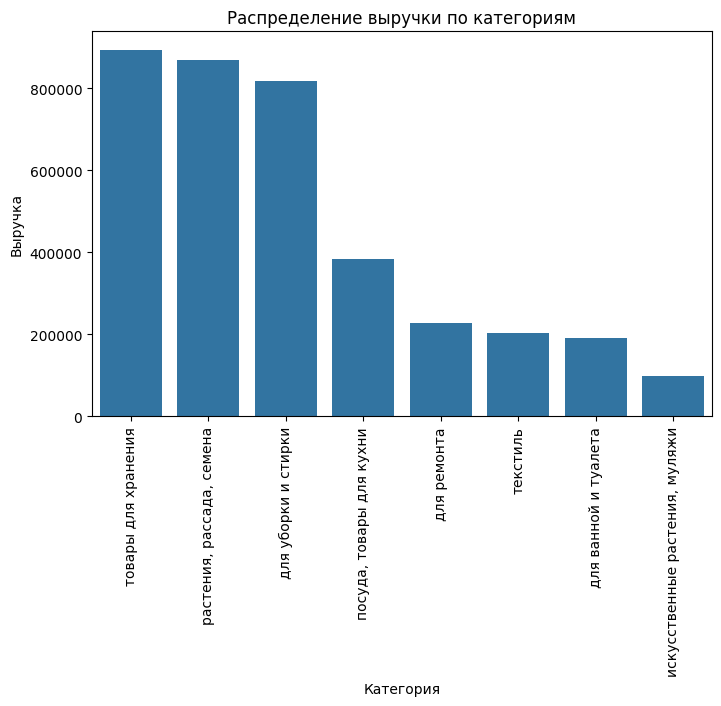

In [79]:
plt.figure(figsize=(8,5))
sns.barplot(data=data_category.sort_values(by='revenue',ascending=False), x="product_category", y="revenue")
plt.title('Распределение выручки по категориям')
plt.xlabel('Категория')
plt.ylabel('Выручка')
plt.xticks(rotation=90)
plt.show()

По выручке лидируют следующие категории: "товары для хранения"(24,25%), "растения, рассада, семена"(23,58%), "для уборки и стирки"(22,19%). Меньше всего выручка у "искусственные растения, муляжи"(2,65%)

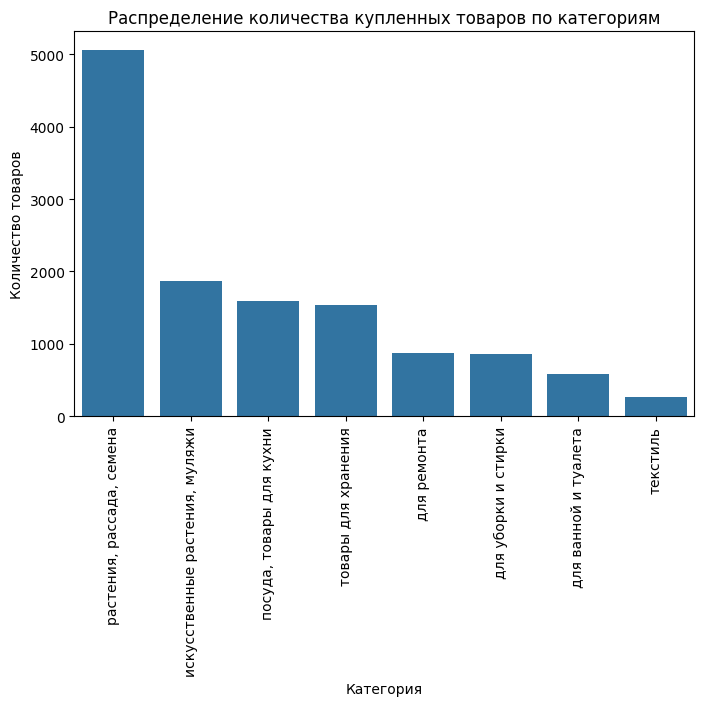

In [80]:
plt.figure(figsize=(8,5))
sns.barplot(data=data_category.sort_values(by='total_quantity',ascending=False), x="product_category", y="total_quantity")
plt.title('Распределение количества купленных товаров по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество товаров')
plt.xticks(rotation=90)
plt.show()

По количеству проданных товаров лидируют следующие категории: "растения, рассада, семена"(40,00%), "искусственные растения, муляжи"(14,73%), "товары для хранения"(12,18%), "посуда, товары для кухни"(12,61%). Меньше всего количество проданных товаров в категории "текстиль"(2,14%)

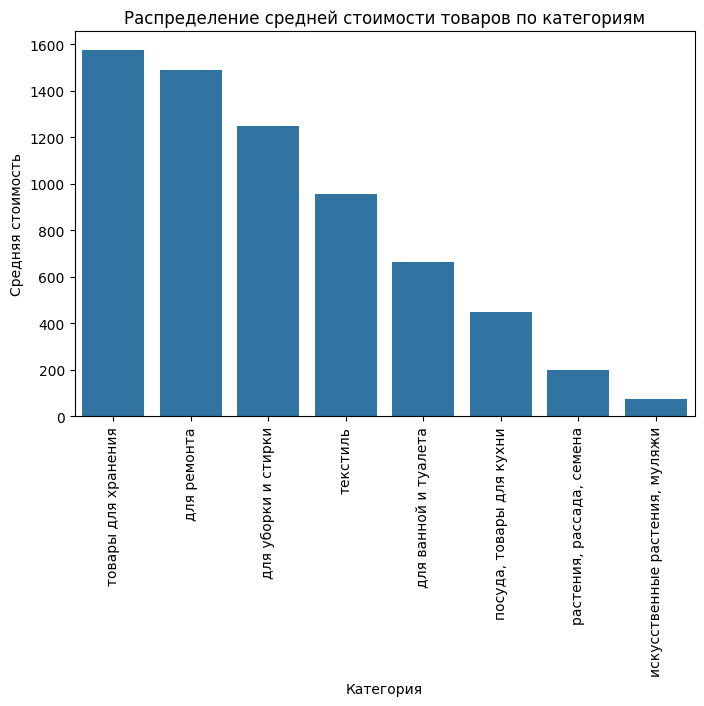

In [81]:
plt.figure(figsize=(8,5))
sns.barplot(data=data_category.sort_values(by='mean_price',ascending=False), x="product_category", y="mean_price")
plt.title('Распределение средней стоимости товаров по категориям')
plt.xlabel('Категория')
plt.ylabel('Средняя стоимость')
plt.xticks(rotation=90)
plt.show()

По средней стоимости товара в категории лидируют следующие категории: "товары для хранения"(1576,4р.),"для ремонта"(1489,4р.), "для уборки и стирки"(1248,1р.). Меньше всего средняя цена у "искусственные растения, муляжи"(73,6р.)

Т.о., наибольшую прибыль приносят "товары для хранения", "растения, рассада, семена", "для уборки и стирки". При этом, категория "растения, рассада, семена" приносит выручку за счет наибольшего количества заказываемого товара, а 2 другие категории - за счет достаточно высокой средней стоимости товара (наличия в группе дорогостоящих товаров).  
"Текстиль", "товары для ванной и туалета", "искусственные цветы и муляжи" составляют вместе всего лишь 13,34% от общего объема выручки.

Посмотрим на распределение выручки по категориям по месяцам.

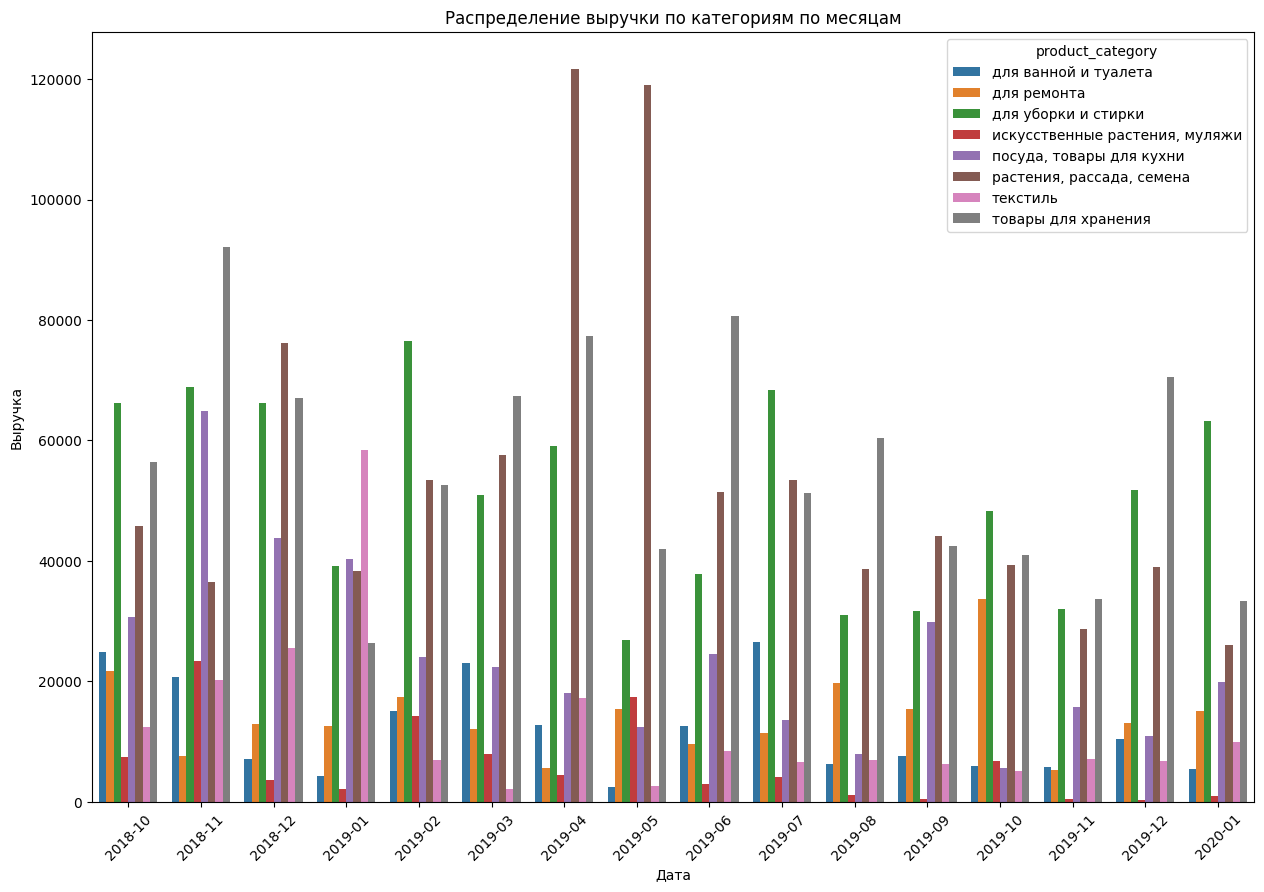

In [82]:
plt.figure(figsize=(15,10))
sns.barplot(data=data.groupby(['month','product_category'], as_index=False).agg({'total_price':'sum','quantity':'sum'}), x="month", y="total_price",hue='product_category')
plt.title('Распределение выручки по категориям по месяцам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.show()

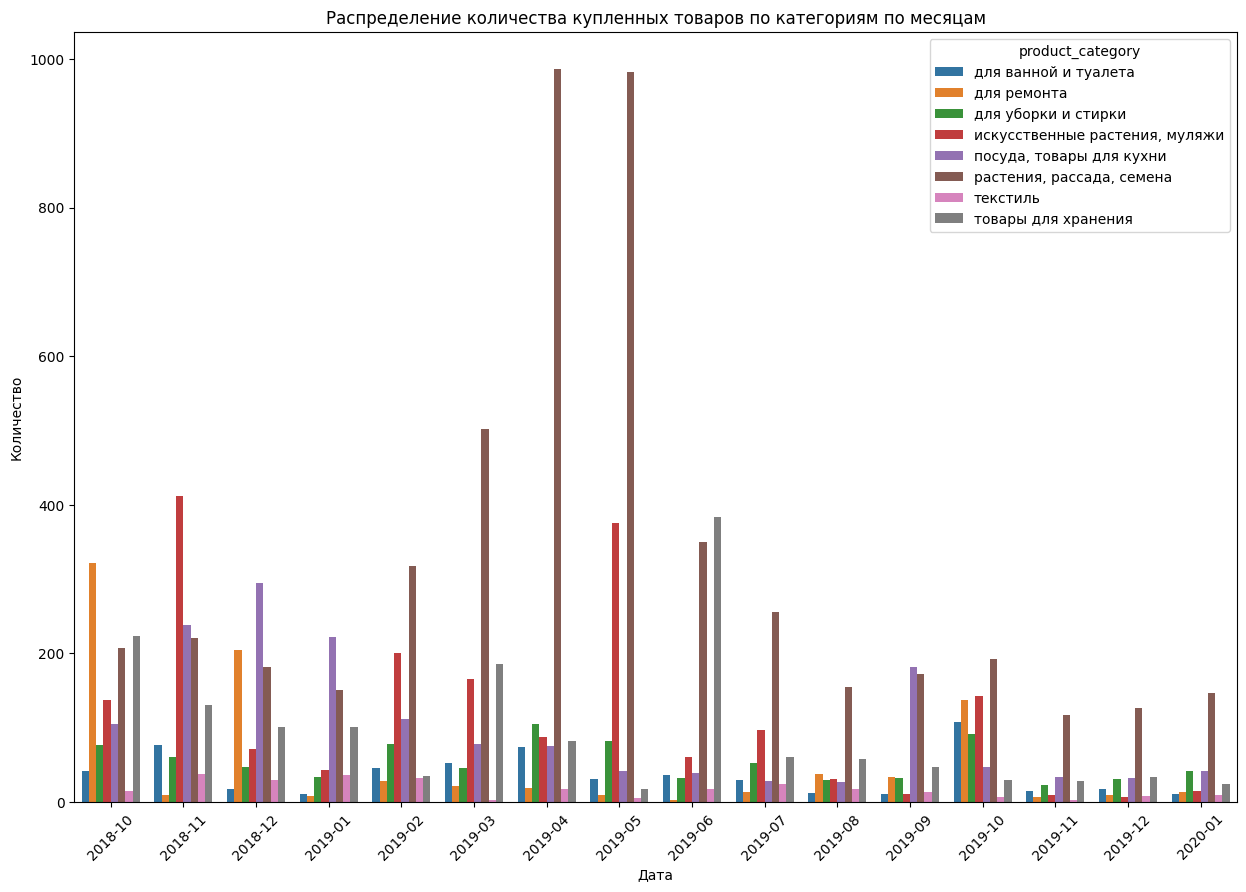

In [83]:
plt.figure(figsize=(15,10))
sns.barplot(data=data.groupby(['month','product_category'], as_index=False).agg({'total_price':'sum','quantity':'sum'}), x="month", y="quantity",hue='product_category')
plt.title('Распределение количества купленных товаров по категориям по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Если рассматривать категории-лидеры по выручке и по количеству купленных товаров по месяцам, то:
- выручка "товары для хранения" наибольшая в ноябре-декабре 2018, марте-апреле, июне, августе и декабре 2019, а количество - в  июне 2019 и в октябре 2018. В другие месяцы высокой выручки скорее всего закупались более дорогие товары в этой категории. 
- выручка "растения, рассада, семена" наибольшая в апреле-мае 2019(как и количество купленного товара, количество товаров также высокое в марте), что объясняется посадочным сезоном, также значительная в декабре 2018г.(возможно проводились распродажи дорогих растений для дома или тех, которые закупаются зимой, а высаживаются весной).
-  выручка "для уборки и стирки" наибольшая в октябре-декабре 2018г., феврале, июле 2019, январе 2020г. Скорее всего в эти месяцы больше покупались дорогие товары в категории(такие, как гладильные доски и сушилки для белья), т.к. такой же динамики по количеству нет.

<b>Выводы:</b> 
Товары были разбиты на категории: созданы словари товаров, написана и применена собственная функция, которая присваивает категорию товару в зависимости от того, в каком словаре содержится часть его названия.  
Товары разнесены по 8 категориям:  
- 'растения, рассада, семена',  
-  'для уборки и стирки',  
-  'для ванной и туалета',  
-  'товары для хранения',  
-  'посуда, товары для кухни',  
-  'искусственные растения, муляжи',  
-  'текстиль',  
-  'для ремонта'    
По выручке лидируют следующие категории: "товары для хранения"(24,25%), "растения, рассада, семена"(23,58%), "для уборки и стирки"(22,19%). Меньше всего выручка у "искусственные растения, муляжи"(2,65%)  

По количеству проданных товаров лидируют следующие категории: "растения, рассада, семена"(40,00%), "искусственные растения, муляжи"(14,73%), "товары для хранения"(12,18%), "посуда, товары для кухни"(12,61%). Меньше всего количество проданных товаров в категории "текстиль"(2,14%)  

По средней стоимости товара в категории лидируют следующие категории: "товары для хранения"(1576,4р.),"для ремонта"(1489,4р.), "для уборки и стирки"(1248,1р.). Меньше всего средняя цена у "искусственные растения, муляжи"(73,6р.)  

Т.о. наибольшую прибыль приносят "товары для хранения", "растения, рассада, семена", "для уборки и стирки". При этом, категория "растения, рассада, семена" приносит выручку за счет наибольшего количества заказываемого товара, а 2 другие категории - за счет достаточно высокой средней стоимости товара (наличия в группе дорогостоящих товаров).  

"Текстиль", "товары для ванной и туалета", "искусственные цветы и муляжи" составляют вместе всего лишь 13,34% от общего объема выручки.

Если рассматривать категории-лидеры по выручке и по количеству купленных товаров по месяцам, то:  
•	выручка "товары для хранения" наибольшая в ноябре-декабре 2018, марте-апреле, июне, августе и декабре 2019, а количество - в июне 2019 и в октябре 2018. В другие месяцы высокой выручки скорее всего закупались более дорогие товары в этой категории.  
•	выручка "растения, рассада, семена" наибольшая в апреле-мае 2019(как и количество купленного товара, количество товаров также высокое в марте), что объясняется посадочным сезоном, также значительная в декабре 2018г.(возможно проводились распродажи дорогих растений для дома или тех, которые закупаются зимой, а высаживаются весной).  
•	выручка "для уборки и стирки" наибольшая в октябре-декабре 2018г., феврале, июле 2019, январе 2020г. Скорее всего в эти месяцы больше покупались дорогие товары в категории(такие, как гладильные доски и сушилки для белья), т.к. такой же динамики по количеству нет.  

## Сегментация покупателей на группы и их анализ.

### Сегментация покупателей на группы с использованием RFM анализа(по давности последней покупки, частоте покупок и сумме заказа)

Добавим столбец с датой последней покупки.

In [84]:
data=data.merge(data_time_interval[['customer_id','days_last_order']],on='customer_id',how='left')
data

,date,customer_id,order_id,product,quantity,price,total_price,month,product_category,days_last_order
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,"растения, рассада, семена",488.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10,"растения, рассада, семена",488.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,"растения, рассада, семена",488.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10,"растения, рассада, семена",488.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10,"растения, рассада, семена",488.0
...,...,...,...,...,...,...,...,...,...,...
5333,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,2020-01,"растения, рассада, семена",1.0
5334,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01,"растения, рассада, семена",1.0
5335,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,354.0,2020-01,товары для хранения,1.0
5336,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,2020-01,"растения, рассада, семена",1.0


In [85]:
data_clients = data.groupby('customer_id',as_index=False).agg({'days_last_order':'first','month':'first','order_id':'nunique','total_price':'sum'})

In [86]:
data_clients['avg_total_price'] = data_clients['total_price']/data_clients['order_id']

In [87]:
data_clients

,customer_id,days_last_order,month,order_id,total_price,avg_total_price
0,000d6849-084e-4d9f-ac03-37174eaf60c4,108.0,2019-10,1,555.0,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,350.0,2019-02,1,442.0,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,109.0,2019-10,1,914.0,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,369.0,2019-01,1,1649.0,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124.0,2019-09,1,2324.0,2324.0
...,...,...,...,...,...,...
2404,ff601403-b094-4b86-9ac6-264d725b9277,13.0,2019-08,2,1739.0,869.5
2405,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,94.0,2019-10,1,397.0,397.0
2406,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,413.0,2018-12,1,389.0,389.0
2407,ffb80538-3fda-4351-8ea9-9d2bec58bb07,145.0,2019-09,1,974.0,974.0


In [88]:
data_clients[['days_last_order','order_id','avg_total_price']].describe()

,days_last_order,order_id,avg_total_price
count,2409.000000,2409.000000,2409.000000
mean,215.967206,1.375259,1176.413352
std,149.335964,0.525419,2113.100337
min,0.000000,1.000000,15.000000
25%,73.000000,1.000000,300.000000
50%,208.000000,1.000000,652.000000
75%,344.000000,2.000000,1349.000000
max,488.000000,7.000000,49432.000000


In [89]:
data_clients['days_last_order'].quantile([0.33,0.66,1])

0.33    104.00
0.66    299.28
1.00    488.00
Name: days_last_order, dtype: float64

Разобьем клиентов на 3 группы по давности последней покупки исходя из разумности сроков давности последней покупки и специфики продаваемых товаров:  
1 - более 183 дней,  
2- от 93 до 183 дней,  
3 - до 92 дней.

In [90]:
def recency(res):
    if res > 274:
        return 1
    if 92 < res <= 274:
        return 2
    if res <= 92:
        return 3

In [91]:
data_clients['recency'] = data_clients['days_last_order'].apply(recency)

In [92]:
data_clients.groupby('recency').agg({'customer_id':'count'})

,customer_id
recency,
1,940
2,732
3,737


Т.к. большая часть клиентов совершает только 1 покупку, почти в 2 раза меньше - 2 покупки и незначительная часть - больше 3, разобьем клиентов на 3 группы:  

1 - одна покупка,  
2- две покупки,  
3 - более 2 покупок.

In [93]:
def frequency(freq):
    if freq == 1:
        return 1
    if freq == 2:
        return 2
    if freq > 2:
        return 3

In [94]:
data_clients['frequency'] = data_clients['order_id'].apply(frequency)


In [95]:
data_clients.groupby('frequency').agg({'customer_id':'count'})

,customer_id
frequency,
1,1539
2,845
3,25


In [96]:
data_clients['avg_total_price'].quantile([0.47,0.935])

0.470     596.0
0.935    3298.0
Name: avg_total_price, dtype: float64

Разобьем клиентов на 3 группы по сумме заказа, учитывая, что в значениях сумм заказов есть большие выбросы:  
1 - до 600р.(низкий чек),  
2- от 600 до 3300 (средний чек),  
3 - более 3300 (высокий чек). В эту категорию как раз попадут выбросы по сумме чека, которые мы не стали удалять. Оставшуюся часть клиентов разделим примерно пополам по количеству клиентов.

In [97]:
def monetary(monet):
    if monet <= 600:
        return 1
    if 600 < monet <=3300:
        return 2
    if monet > 3300:
        return 3

In [98]:
data_clients['monetary'] = data_clients['avg_total_price'].apply(monetary)

In [99]:
data_clients.groupby('monetary').agg({'customer_id':'count'})

,customer_id
monetary,
1,1160
2,1094
3,155


Добавим столбец rfm.

In [100]:
data_clients['rfm'] = data_clients['recency']*100+data_clients['frequency']*10+data_clients['monetary']
data_clients

,customer_id,days_last_order,month,order_id,total_price,avg_total_price,recency,frequency,monetary,rfm
0,000d6849-084e-4d9f-ac03-37174eaf60c4,108.0,2019-10,1,555.0,555.0,2,1,1,211
1,001cee7f-0b29-4716-b202-0042213ab038,350.0,2019-02,1,442.0,442.0,1,1,1,111
2,00299f34-5385-4d13-9aea-c80b81658e1b,109.0,2019-10,1,914.0,914.0,2,1,2,212
3,002d4d3a-4a59-406b-86ec-c3314357e498,369.0,2019-01,1,1649.0,1649.0,1,1,2,112
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124.0,2019-09,1,2324.0,2324.0,2,1,2,212
...,...,...,...,...,...,...,...,...,...,...
2404,ff601403-b094-4b86-9ac6-264d725b9277,13.0,2019-08,2,1739.0,869.5,3,2,2,322
2405,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,94.0,2019-10,1,397.0,397.0,2,1,1,211
2406,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,413.0,2018-12,1,389.0,389.0,1,1,1,111
2407,ffb80538-3fda-4351-8ea9-9d2bec58bb07,145.0,2019-09,1,974.0,974.0,2,1,2,212


Напишем функцию, которая разобьет клиентов на 6 сегментов по признаку совокупному признаку rfm.  
'потерянные' - совершали 1 покупку, давно и на маленькую или среднюю сумму  
'спящие' - совершали покупку достаточно давно , 1 раз, на маленькую или среднюю сумму и  совершавшие покупку давно , 2 и более раз, на маленькую сумму, 
'спящие лояльные' - совершали покупку достаточно давно, 2 и более раз, на любую сумму  
'бывшие лояльные' - совершали покупку давно, 2 и более раз, на любую сумму  
'активные' - совершали покупку недавно, любое количество раз, на любую сумму  
'идеальные' - совершали покупку недавно, более 2 раз, на крупную сумму.  

In [101]:
def segment(seg):
    if seg in [111,112]:
        return 'потерянные'
    if seg in [211,212,121,131]:
        return 'спящие'
    if seg in [221,222,223,231,232,233,213]:
        return 'спящие лояльные'
    if seg in [132,133,122,123,113]:
        return 'бывшие лояльные'
    if seg in [311,312,313,321,322,323,331,332]:
        return 'активные'
    if seg in [333]:
        return 'идеальные'
    return''

In [102]:
data_clients['segment'] = data_clients['rfm'].apply(segment)

In [103]:
data_segments  = data_clients.groupby('segment',as_index=False).agg({'customer_id':'count','total_price':'sum','order_id':'sum'})

In [104]:
data_segments['avg_total_price'] = data_segments ['total_price']/data_segments ['customer_id']

In [105]:
data_segments['avg_order'] = data_segments ['order_id']/data_segments ['customer_id']

In [106]:
data_segments['share_tot_price'] = round((data_segments['total_price']/data_segments['total_price'].sum())*100,1)

In [107]:
data_segments['share_tot_order'] = round((data_segments['order_id']/data_segments['order_id'].sum())*100,1)

In [108]:
data_segments

,segment,customer_id,total_price,order_id,avg_total_price,avg_order,share_tot_price,share_tot_order
0,активные,737,1.263692e+06,1455,1714.643713,1.974220,34.3,43.9
1,бывшие лояльные,97,6.468270e+05,137,6668.319588,1.412371,17.5,4.1
2,потерянные,797,7.289360e+05,797,914.599749,1.000000,19.8,24.1
3,спящие,646,5.124620e+05,703,793.284830,1.088235,13.9,21.2
4,спящие лояльные,132,5.362150e+05,221,4062.234848,1.674242,14.5,6.7


В результате сегментации обнаружилось, что "идеальных" клиентов у компании на текущий момент нет. В итоге осталось только 5 сегментов.

Посмотрим, отличаются ли признаки(количество клиентов, стоимость заказа, количество заказов, средняя стоимость заказа, среднее количество заказов) по сегментам. 

In [109]:
segment_features = data_segments
numeric_columns_seg = segment_features.drop(columns=['segment']).columns
segment_features.style.format({i: '{:.2f}' for i in numeric_columns_seg}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns_seg) \
    .highlight_min(color='coral', subset=numeric_columns_seg)

,segment,customer_id,total_price,order_id,avg_total_price,avg_order,share_tot_price,share_tot_order
0,активные,737.00,1263692.42,1455.00,1714.64,1.97,34.30,43.90
1,бывшие лояльные,97.00,646827.00,137.00,6668.32,1.41,17.50,4.10
2,потерянные,797.00,728936.00,797.00,914.60,1.00,19.80,24.10
3,спящие,646.00,512462.00,703.00,793.28,1.09,13.90,21.20
4,спящие лояльные,132.00,536215.00,221.00,4062.23,1.67,14.50,6.70


Различия по значениям признаков(количество клиентов, стоимость заказа, количество заказов, средняя стоимость заказа, среднее количество заказов) у сегментов присутствуют.

По количеству клиентов сегменты "новички", "потерянные" и "спящие" сопоставимы по размеру и составляют в общей сложности 90% всех клиентов, на "бывшие лояльные" и "спящие лояльные" приходятся оставшиеся 10%.

Если посмотреть по средним значениям, то:  

- максимальный средний чек заказа у "бывших лояльных" и "спящих лояльных"(6668,32р и 4062,23р., соответственно) при среднем количестве заказов на 1 клиента 1,41 и 1,67, соответственно,(среднее значение по сегментам), т.е. они приносят высокий доход за счет высоких чеков и хорошей активности заказов, но различаются по времени последней активности. Это те клиенты, которых важно сохранить или вернуть.  
- у "активных" средний размер среднего чека заказа- 1714,64р. при максимальном количестве заказов на 1 клиента - 1,97. Они приносят хороший доход за счет среднего чека и высокой активности заказов. Важно поддерживать их активность маркетинговыми мероприятиями без особых затрат, но не часто.  
- наименьший средний чек заказа у "потерянных" и "спящих"(914,60р. и 793,28р.), также, как и количество заказов(1,1 и 1,09). Различаются по времени последней активности. На "потерянных" стоит тратить усилия, если в составе покупаемых ими товаров есть сезонные, и поэтому есть шанс их вернуть."Спящим" можно предлагать и другие товары, не производя при этом существенных финансовых вложений, т.к. они могут не окупиться.  

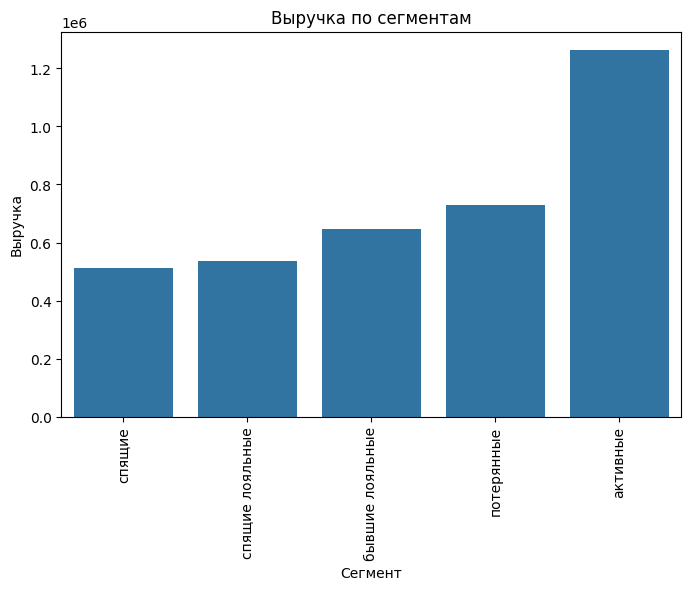

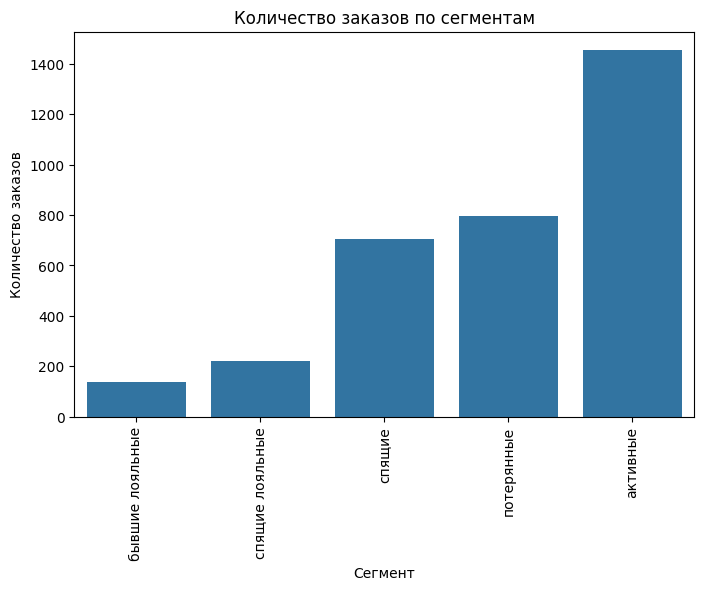

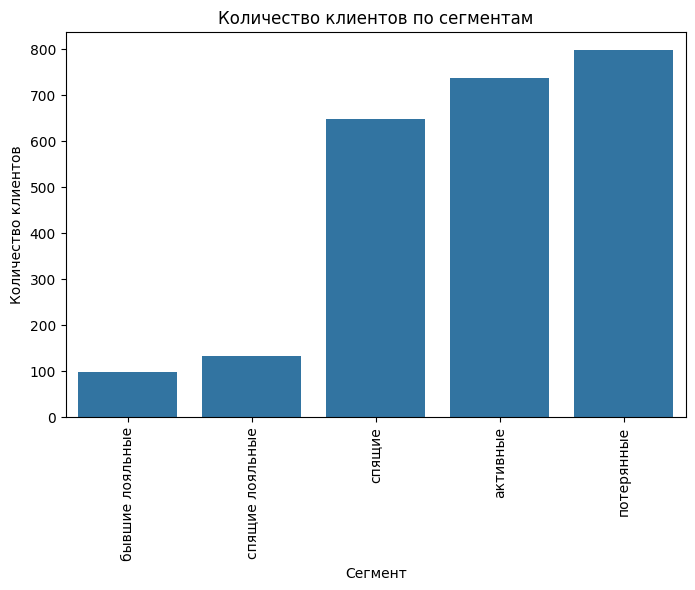

In [110]:
plt.figure(figsize=(8,5))
sns.barplot(data=data_segments.sort_values(by='total_price'), x='segment', y='total_price')
plt.title('Выручка по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Выручка')
plt.xticks(rotation=90)

plt.figure(figsize=(8,5))
sns.barplot(data=data_segments.sort_values(by='order_id'), x='segment', y='order_id')
plt.title('Количество заказов по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Количество заказов')
plt.xticks(rotation=90)


plt.figure(figsize=(8,5))
sns.barplot(data=data_segments.sort_values(by='customer_id'), x='segment', y='customer_id')
plt.title('Количество клиентов по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=90)
plt.show()

Большую долю по выручке и количеству заказов занимают "активные".  Наименьшую - "спящие"(количество заказов среднее) и "спящие лояльные" (количество маленькое).
По количеству клиентов сегменты "спящие", "активные" и "потерянные" не имеют сильных различий.


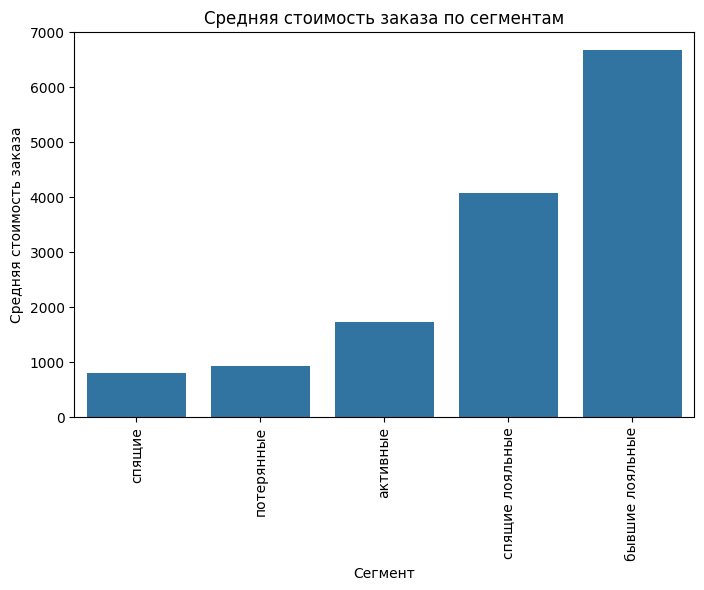

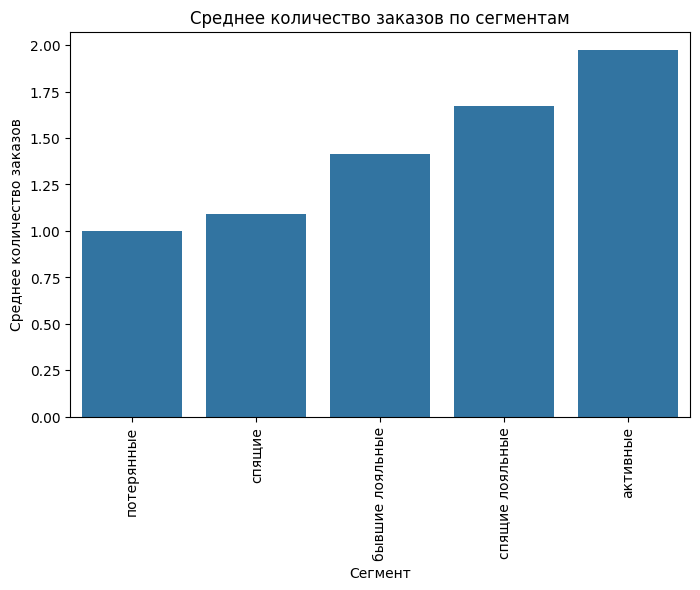

In [111]:
plt.figure(figsize=(8,5))
sns.barplot(data=data_segments.sort_values(by='avg_total_price'), x='segment', y='avg_total_price')
plt.title('Средняя стоимость заказа по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Средняя стоимость заказа')
plt.xticks(rotation=90)

plt.figure(figsize=(8,5))
sns.barplot(data=data_segments.sort_values(by='avg_order'), x='segment', y='avg_order')
plt.title('Среднее количество заказов по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation=90)
plt.show()
plt.show()

Наибольшую среднюю выручку с 1 заказа приносят "бывшие лояльные" клиенты. Также хорошая средняя выручка с одного заказа у "спящих лояльных", ниже всего - у "спящих".

Среднее количество заказов выше всего у "активных", ниже всего - у "потерянных" и  "спящих".

### Посмотрим сегменты в разрезе категорий товаров.

Объединим таблицы data и data_clients по customer_id, чтобы присвоить значение сегмента каждому клиенту.


In [112]:
data=data.merge(data_clients[['customer_id','rfm','segment']],on='customer_id',how='left')
data.head(5)

,date,customer_id,order_id,product,quantity,price,total_price,month,product_category,days_last_order,rfm,segment
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,"растения, рассада, семена",488.0,112,потерянные
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10,"растения, рассада, семена",488.0,112,потерянные
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,"растения, рассада, семена",488.0,112,потерянные
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10,"растения, рассада, семена",488.0,112,потерянные
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10,"растения, рассада, семена",488.0,112,потерянные


Сгруппируем данные по покупателю и категории товаров, а затем - по сегменту и категории товаров.  
Расчитаем по ним общую выручку, количество товаров, количество заказов и количество клиентов.  
Затем построим графики распределения этих параметров.

In [113]:
data_client_product= data.groupby(['customer_id','product_category'], as_index=False).agg({'total_price':'sum','order_id':'nunique','quantity':'sum','rfm':'first','segment':'first'}).sort_values(by='customer_id')
data_client_product.head(5)

,customer_id,product_category,total_price,order_id,quantity,rfm,segment
0,000d6849-084e-4d9f-ac03-37174eaf60c4,"растения, рассада, семена",555.0,1,4,211,спящие
1,001cee7f-0b29-4716-b202-0042213ab038,для уборки и стирки,442.0,1,1,111,потерянные
2,00299f34-5385-4d13-9aea-c80b81658e1b,для уборки и стирки,914.0,1,2,212,спящие
3,002d4d3a-4a59-406b-86ec-c3314357e498,товары для хранения,1649.0,1,1,112,потерянные
4,003bbd39-0000-41ff-b7f9-2ddaec152037,товары для хранения,2324.0,1,2,212,спящие


In [114]:
data_sement_product = data_client_product.groupby(['segment','product_category'],as_index=False).agg({'total_price':'sum','quantity':'sum','order_id':'sum','customer_id':'count'})

In [115]:
data_sement_product.head(5)

,segment,product_category,total_price,quantity,order_id,customer_id
0,активные,для ванной и туалета,73146.000000,103,98,94
1,активные,для ремонта,83984.333333,57,54,54
2,активные,для уборки и стирки,389354.000000,275,263,240
3,активные,"искусственные растения, муляжи",2238.333333,37,34,33
4,активные,"посуда, товары для кухни",103906.500000,189,184,170


In [116]:
data_sement_product.columns = ['segment','product_category','total_price','quantity','order_id','customer_id']

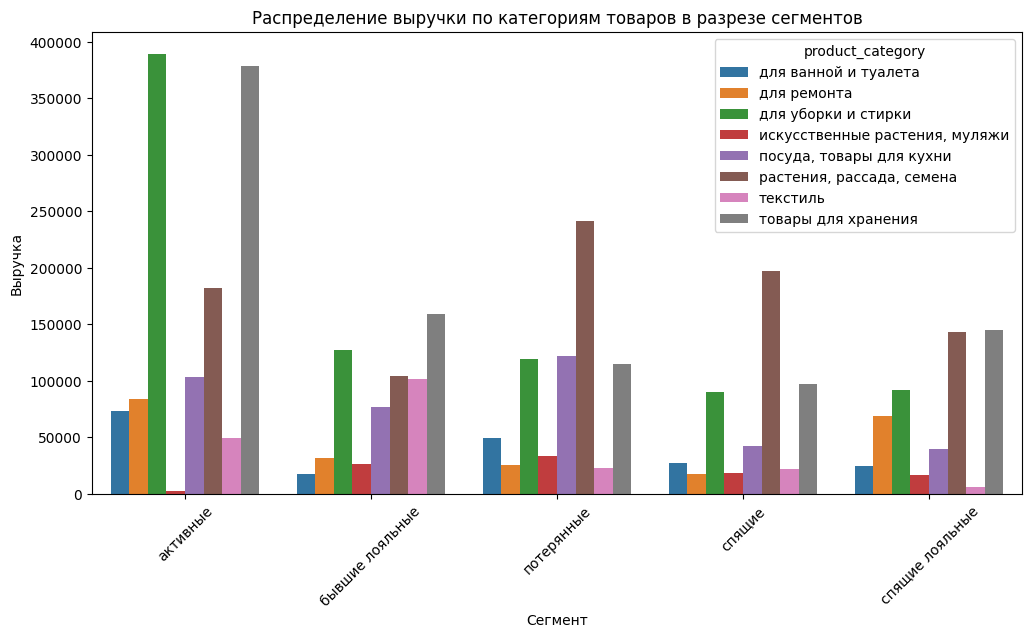

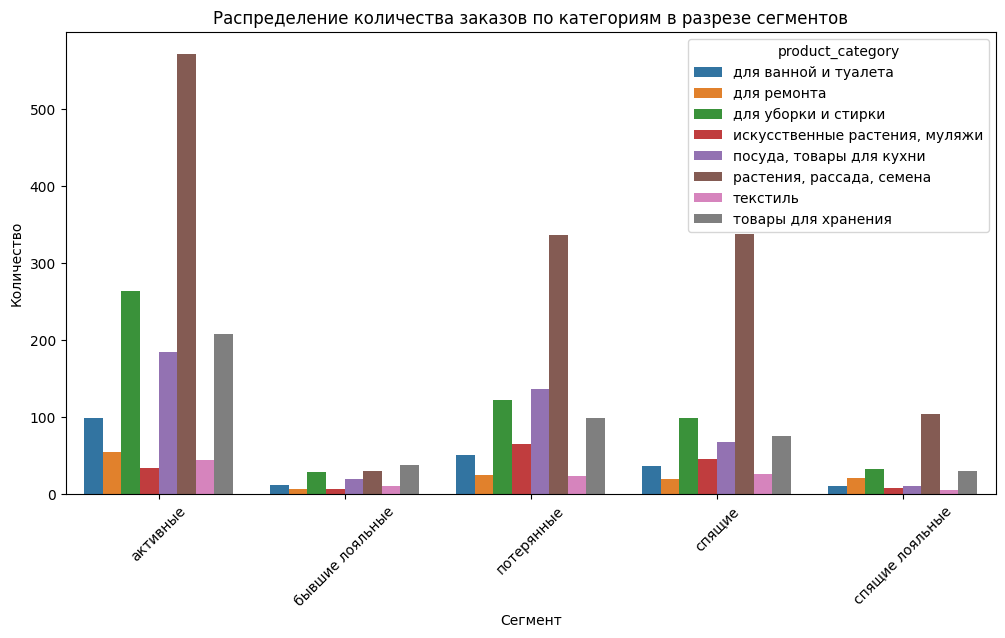

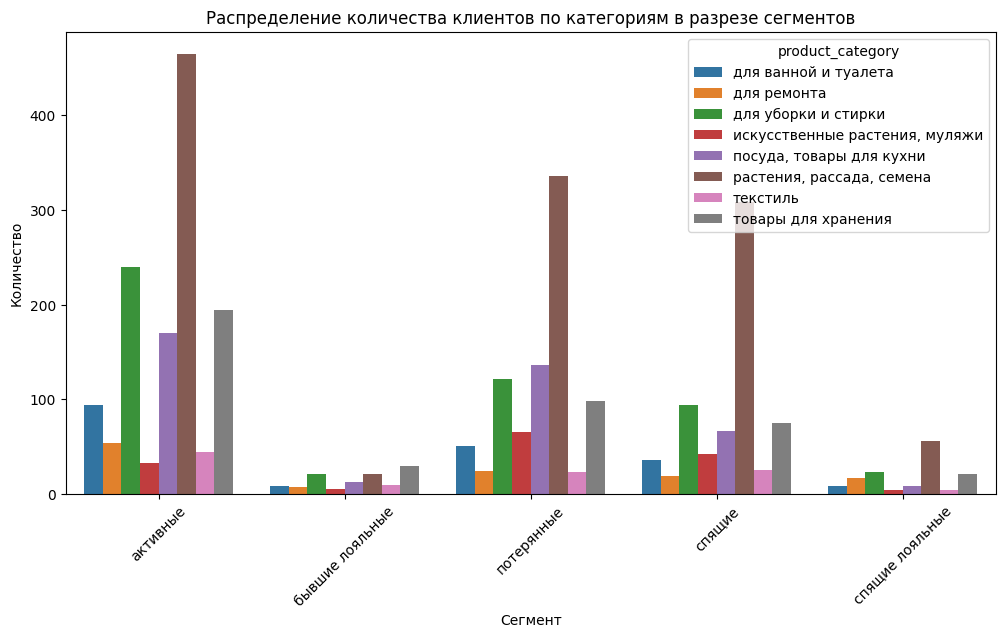

In [117]:
plt.figure(figsize=(12,6))
sns.barplot(data=data_sement_product, x='segment', y='total_price',hue='product_category')
plt.title('Распределение выручки по категориям товаров в разрезе сегментов')
plt.xlabel('Сегмент')
plt.ylabel('Выручка')
plt.xticks(rotation=45)

plt.figure(figsize=(12,6))
sns.barplot(data=data_sement_product, x='segment', y='order_id',hue='product_category')
plt.title('Распределение количества заказов по категориям в разрезе сегментов')
plt.xlabel('Сегмент')
plt.ylabel('Количество')
plt.xticks(rotation=45)

plt.figure(figsize=(12,6))
sns.barplot(data=data_sement_product, x='segment', y='customer_id',hue='product_category')
plt.title('Распределение количества клиентов по категориям в разрезе сегментов')
plt.xlabel('Сегмент')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Теперь посмотрим, как меняются данные параметры по каждому сегменту в разрезе категорий в динамике (по месяцам). Проверим на наличие сезонности в продажах.

Напишем функцию для постороения графика распределения определенного признака по месяцам в разрезе категорий товаров для каждого сегмента.

In [118]:
def segment_cat_date(df,seg,column):
    """Функция для постороения графика распределения определенного признака по месяцам в разрезе категорий товаров\
    для каждого сегмента .

    df-анализируемый датафрейм, seg - анализируемый сегмент, column-анализируемые параметры.
    """
    for i in seg:
        for j in column:
            plt.figure(figsize=(12,5))
            sns.barplot(data=df[df['segment'] == i].groupby(['product_category','month'], as_index=False).agg({'total_price':'sum','order_id':'nunique','quantity':'sum'}).sort_values(by='month'), x='month', y=j,hue='product_category')
            plt.xlabel('Дата')
            plt.title(i)
            plt.xticks(rotation=45)
            plt.legend(loc="upper left")
            if j == 'total_price':
                plt.ylabel('Выручка')
                plt.show()
            if j == 'order_id':
                plt.ylabel('Количество заказов')
                plt.show()
            if j == 'quantity':
                plt.ylabel('Количество товаров')
                plt.show()
        
    return

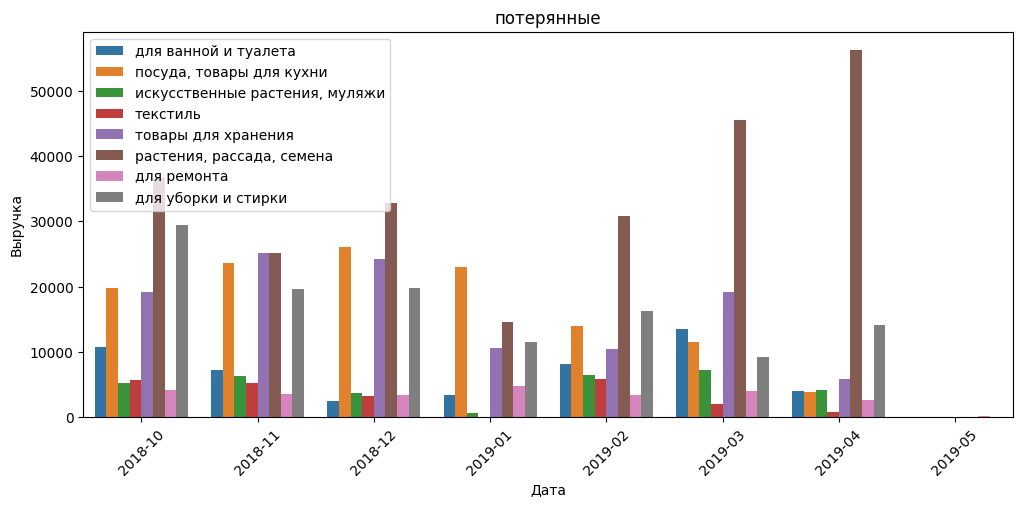

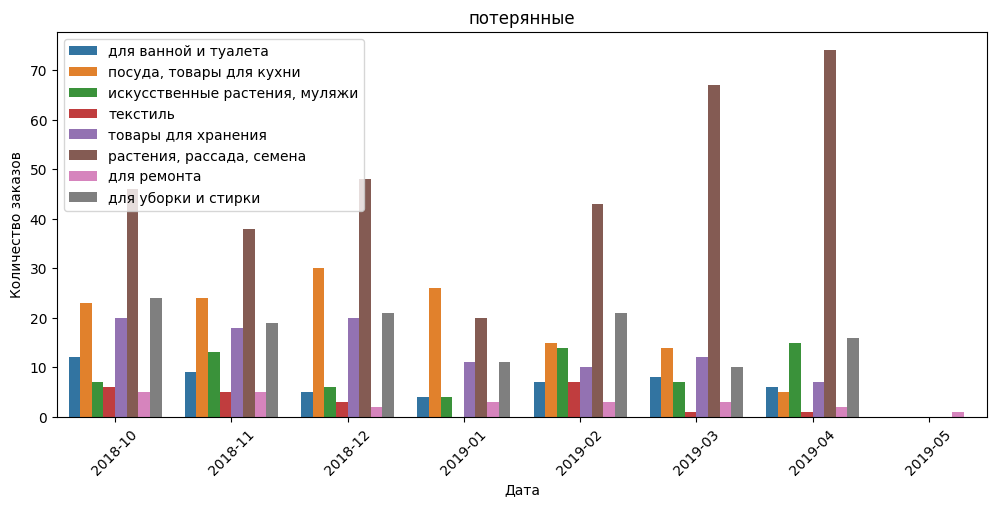

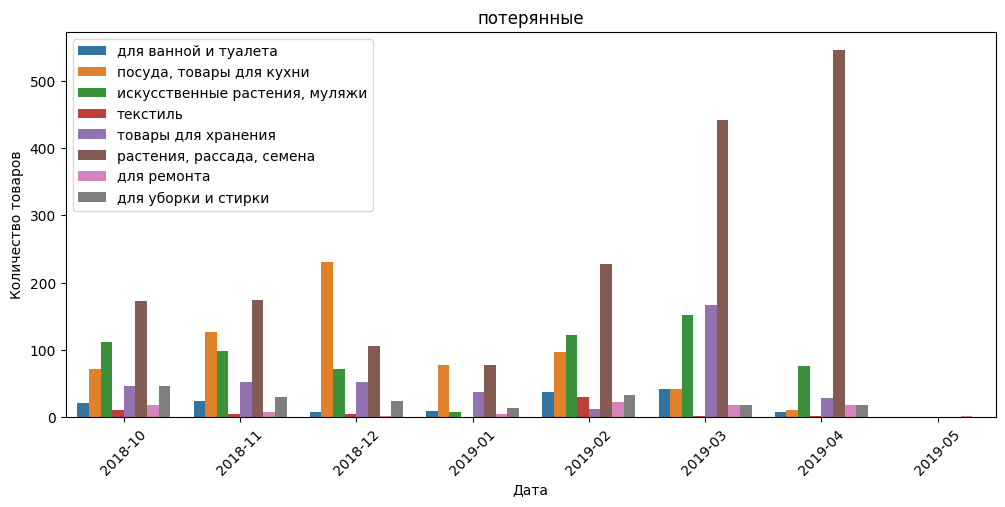

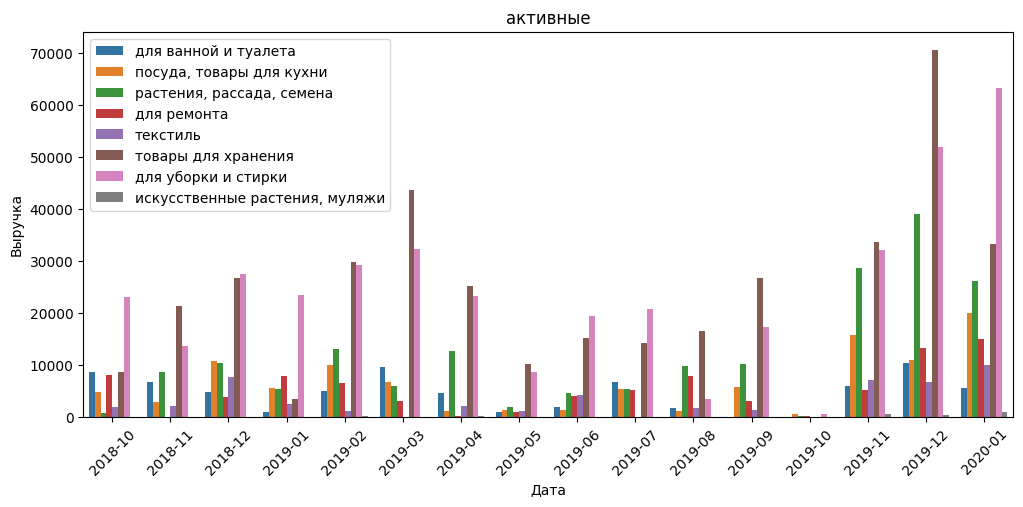

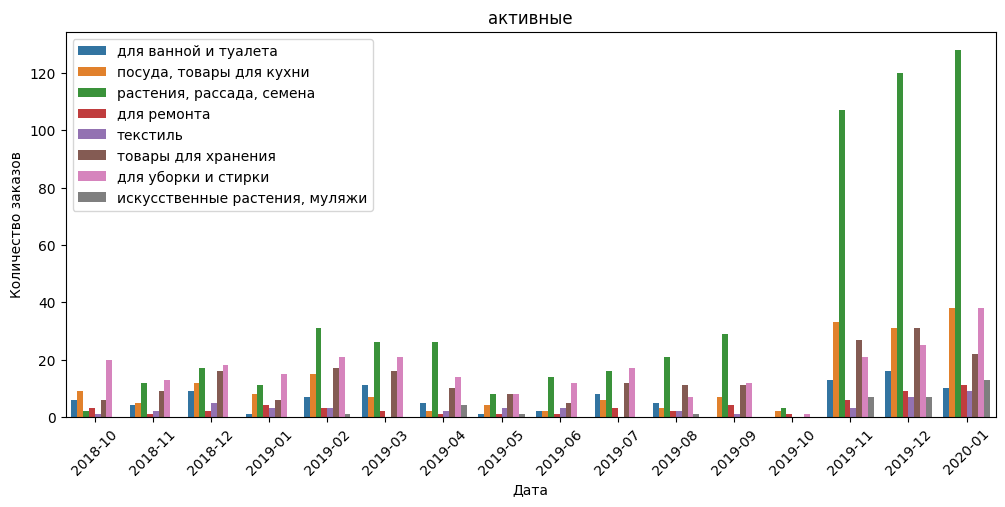

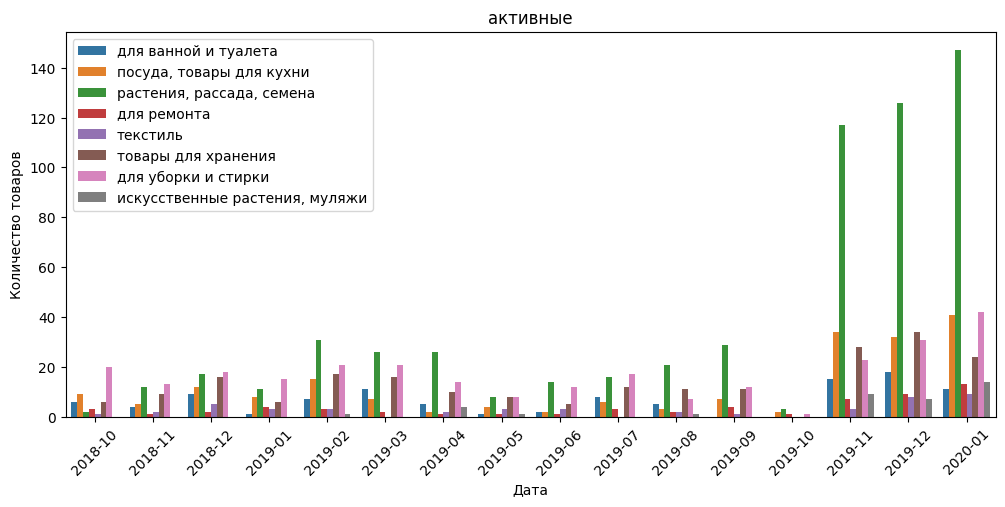

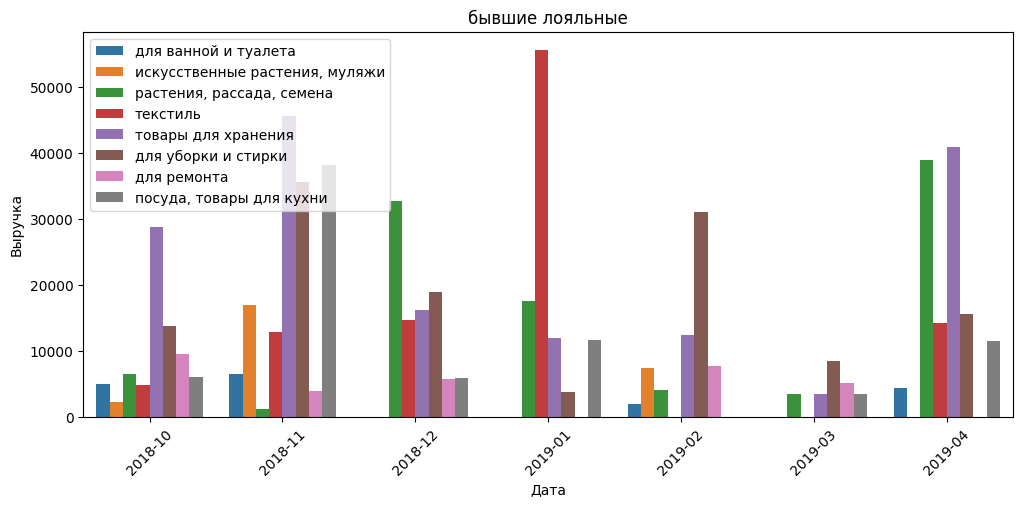

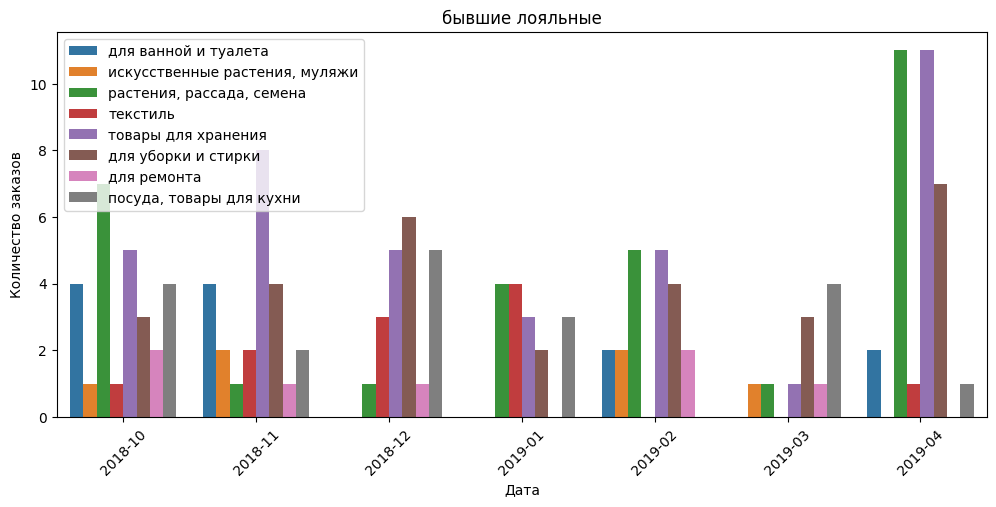

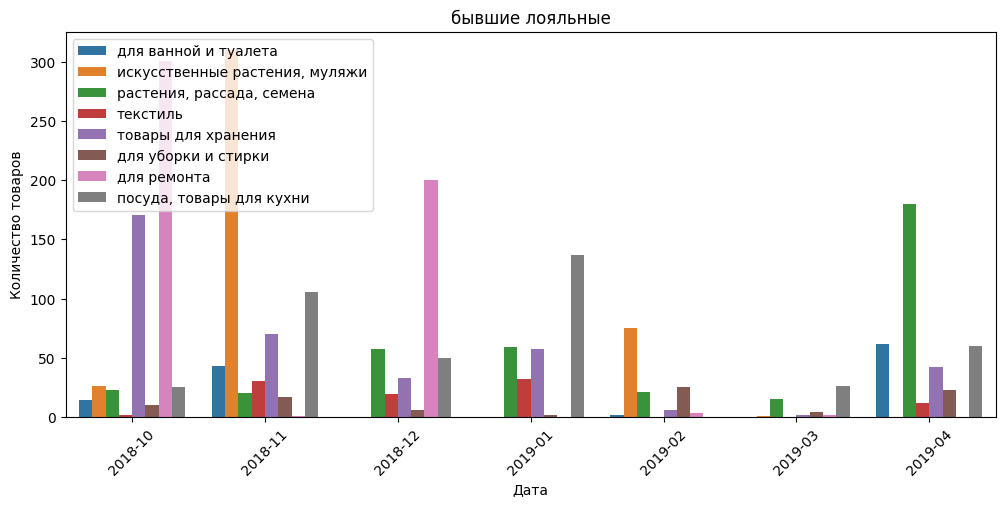

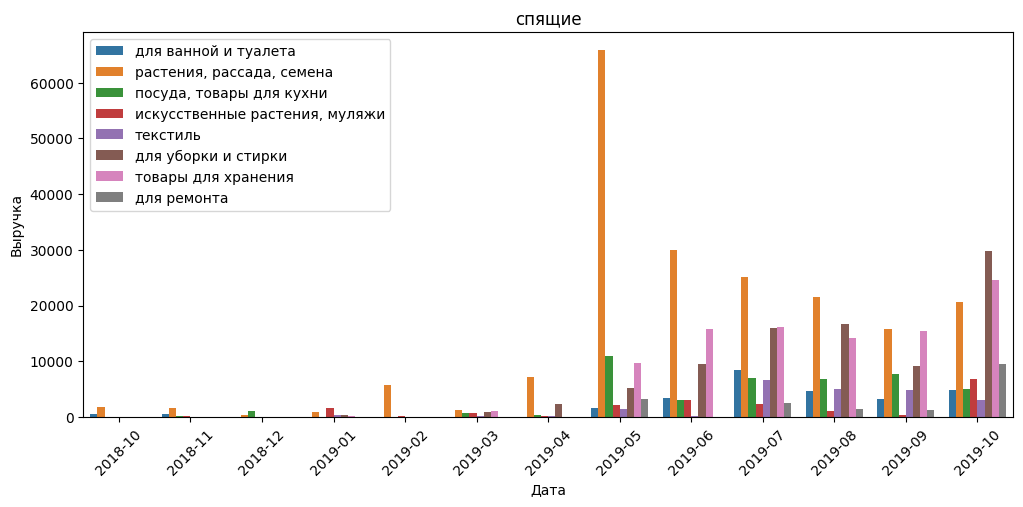

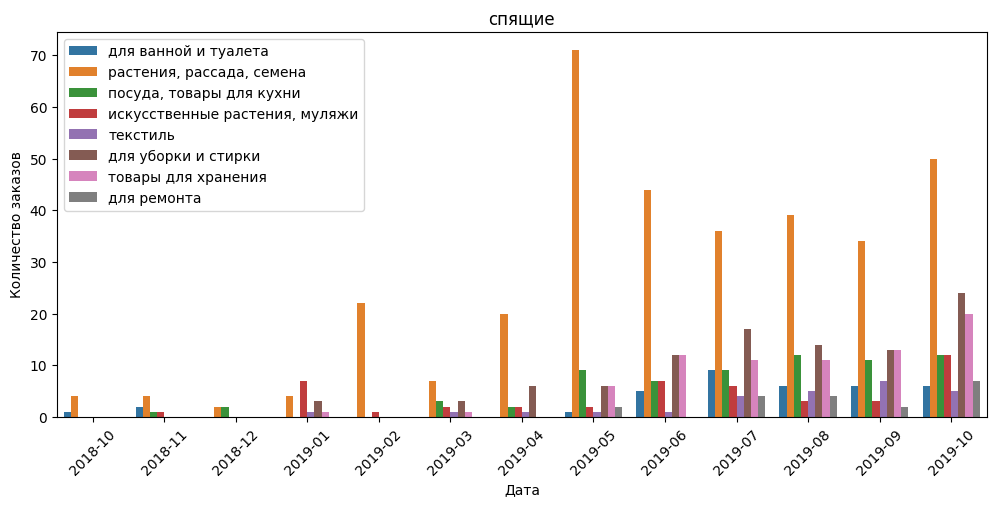

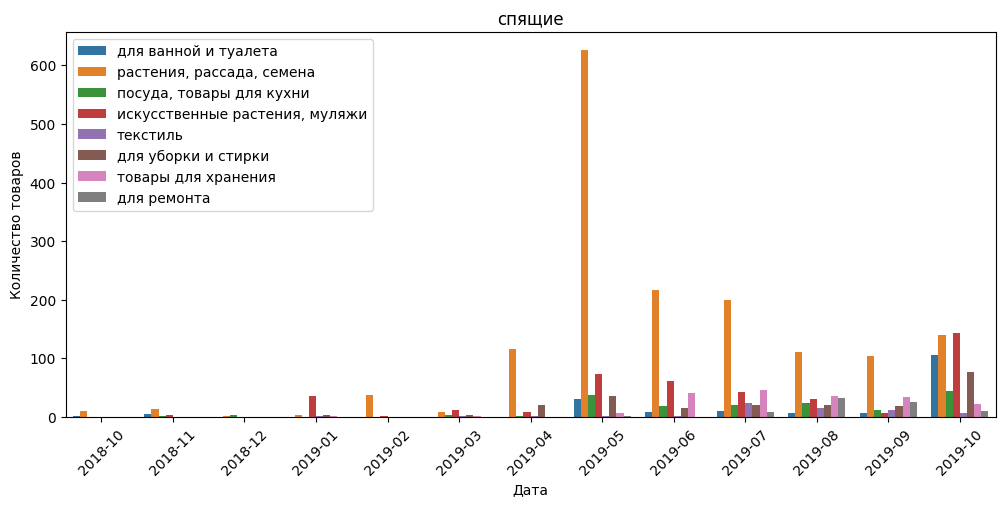

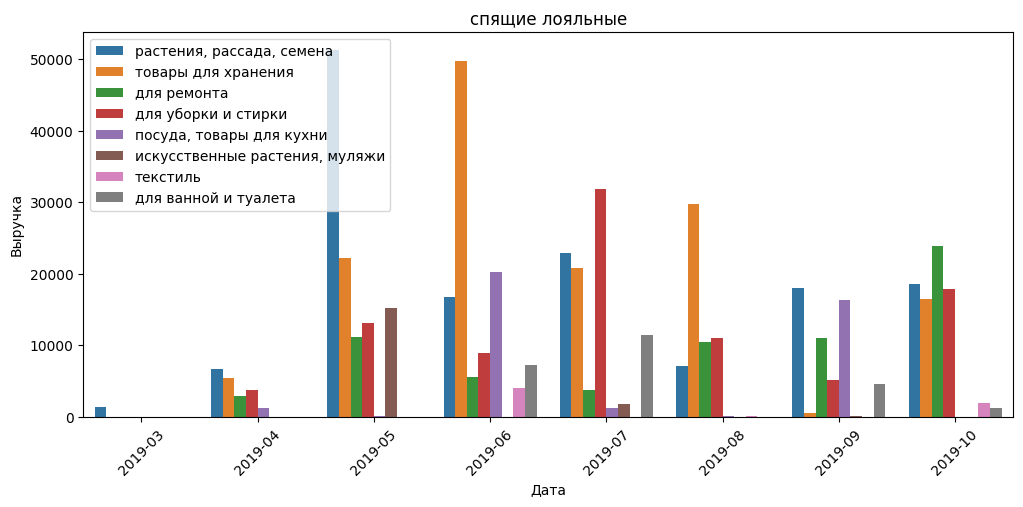

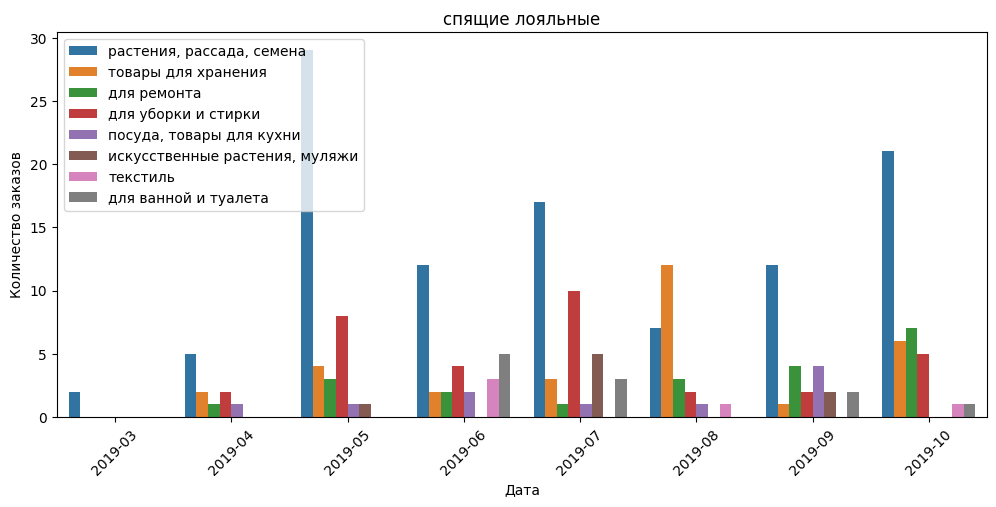

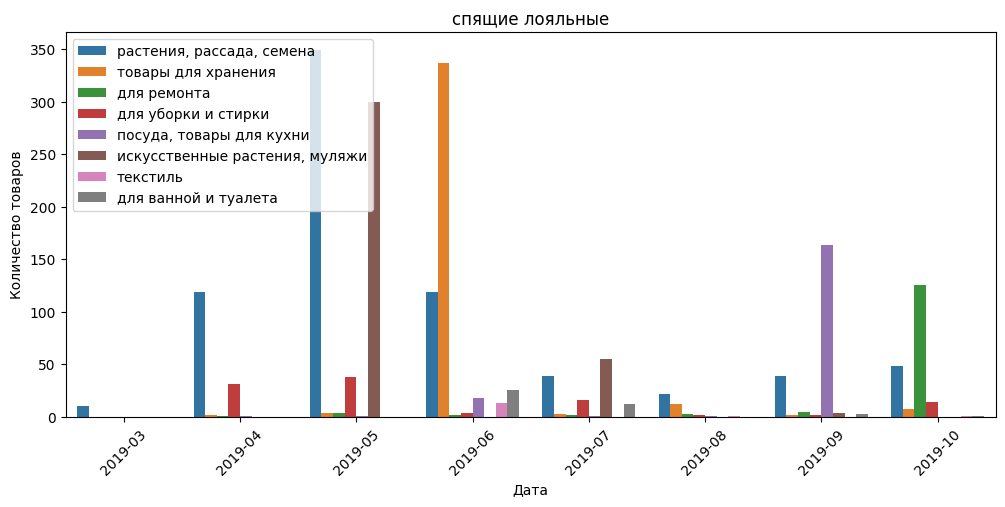

In [119]:
segment_cat_date(data,data['segment'].unique(),['total_price','order_id','quantity'])

- "потерянные": в целом выше всего выручка по категориям "растения, рассада, семена"(как и по количеству заказов и количеству клиентов)(пик - в марте-апреле). Т.к. это клиенты, которые не делали заказ от 6 до 1,3 мес., то есть вероятность вернуть тех, кто делал покупки именно в этой категории товаров, т.к. они имеют сезонность. Примерно в 2 раза меньше значения по выручке и количеству в категориях: "товары для хранения"(максимальная выручка в ноябре-декабре), "для уборки и стирки"(максимальная выручка в октябре-декабре), "посуда, товары для кухни"(максимальная выручка в ноябре-январе).    

Рассылку целесообразно делать по категории "растения, рассада, семена" в октябре-декабре и в феврале-арпеле. Если рассылки связаны с финансовыми издержками, то можно ограничиться периодом март-апрель, когда объемы продаж по данной категории максимальные.  

- "активные": в целом выше всего выручка по категориям "товары для хранения" и "для уборки и стирки"(количество заказов по ним тоже высокое), на 3 месте - "растения, рассада, семена"(по количеству заказов превышает заказы по другим категориям не менее, чем в 2 раза, что говорит о низком среднем чеке в этой категории. Т.к. это зимние месяцы, скорее всего это семена или луковицы растений).  

В категориях "товары для хранения" и "для уборки и стирки" наблюдается некоторая сезонность. Выручка растет в декабре перед НГ и в марте, можно предположить, что покупаются подарки к праздникам, причем товары более высокой стоимости. По категории "для уборки и стирки" еще и в январе. Имеет смысл стимулировать продажи в данные периоды.
"растения, рассада, семена" - наибольшее количество заказов в ноябре-январе, достаточное - в феврале-апреле и сентябре.
Достаточно большое количество заказов в ноябре-январе по категории "посуда, товары для кухни".  

- "Бывшие лояльные": в целом выше всего выручка по категориям  "товары для хранения" и "для уборки и стирки", чуть ниже "растения, рассада, семена" (по количеству заказов больше всего, т.к. средняя стоимость товаров в этой категории ниже, чем в 2 других).  

"товары для хранения" наиболее популярны в ноябре и апреле.
"для уборки и стирки - ноябрь, декабрь, февраль, апрель.  
"растения, рассада, семена" - октябрь, декабрь, январь, фераль, апрель.  
В январе был всплеск выручки в категории "текстиль".  

- "спящие": в целом выше всего выручка и количество заказов по категории "растения, рассада, семена", примерно в 2 раза меньше по объему выручки - "для уборки и стирки", "товары для хранения".
В категории "растения, рассада, семена" всплеск активности в мае, затем средняя активность с июня по октябрь, выделяется также по активности январь.
В октябре были популярны категории "товары для хранения" и "для уборки и стирки"  


- "спящие лояльные": в целом выше всего выручка по категориям "товары для хранения" и "растения, рассада, семена"(как и по количеству).
"товары для хранения" популярны в июне и августе, "растения, рассада, семена" - в мае, июле, октябре.

<b>Выводы</b>:  
Проведена сегментация покупателей на группы с использованием RFM (по давности последней покупки, частоте покупок и сумме заказа)  

Recency: Клиентов разбиты на 3 группы по давности последней покупки исходя из разумности сроков давности последней покупки и специфики продаваемых товаров:    
1 - более 183 дней,  
2- от 93 до 183 дней,  
3 - до 92 дней.   

Frequency: Т.к. большая часть клиентов совершает только 1 покупку, почти в 2 раза меньше - 2 покупки и незначительная часть - больше 3, клиенты разбиты на 3 группы:  
1 - одна покупка (63% клиентов)  
2- две покупки (36% клиентов),  
3 - более 2 покупок (1% клиентов).  

Monetary: клиент разбиты на 3 группы по сумме заказа, учитывая, что в значениях сумм заказов есть большие выбросы:    
1 - до 600р.(низкий чек),    
2- от 600 до 3300 (средний чек),    
3 - более 3300 (высокий чек). В эту категорию как раз попадут выбросы по сумме чека, которые мы не стали удалять. Оставшуюся часть клиентов разделим примерно пополам по количеству клиентов.  

Далее была написана функцию, которая разбивает клиентов на 6 сегментов по признаку совокупному признаку rfm.  
'потерянные' - совершали 1 покупку, давно и на маленькую или среднюю сумму,  
'спящие' - совершали покупку достаточно давно , 1 раз, на маленькую или среднюю сумму и совершавшие покупку давно , 2 и более раз, на маленькую сумму,   'спящие лояльные' - совершали покупку достаточно давно, 2 и более раз, на любую сумму,  
'бывшие лояльные' - совершали покупку давно, 2 и более раз, на любую сумму,  
'активные' - совершали покупку недавно, любое количество раз, на любую сумму,  
'идеальные' - совершали покупку недавно, более 2 раз, на крупную сумму.    

В результате сегментации обнаружилось, что "идеальных" клиентов у компании на текущий момент нет. В итоге осталось только 5 сегментов.  
Рассчитано значение признаков по сегментам(количество клиентов, стоимость заказа, количество заказов, средняя стоимость заказа, среднее количество заказов) и построены графики.  

По количеству клиентов сегменты "активные", "потерянные" и "спящие" сопоставимы по размеру и составляют в общей сложности 90% всех клиентов, на "бывшие лояльные" и "спящие лояльные" приходятся оставшие 10%.

Если посмотреть по средним значениям, то:

- максимальный средний чек заказа у "бывших лояльных" и "спящих лояльных"(6668,32р и 4061,23р., соответственно) при среднем количестве заказов на 1 клиента 1,41 и 1,67, соответственно,(среднее значение по сегментам), т.е. они приносят высокий доход за счет высоких чеков и хорошей активности заказов, но различаются по времени последней активности. Это те клиенты, которых важно сохранить или вернуть.  
- у "новичков" средний размер среднего чека заказа- 1714,64р. при максимальном количестве заказов на 1 клиента - 1,97. Они приносят хороший доход за счет среднего чека и высокой активности заказов. Важно поддерживать их активность маркетинговыми мероприятиями без особых затрат, но не часто.  
-  наименьший средний чек заказа у "потерянных" и "спящих"(914,60р. и 793,28р.), также, как и количество заказов(1,1 и 1,09). Различаются по времени последней активности. На "потерянных" стоит тратить усилия, если в составе покупаемых ими товаров есть сезонные, и поэтому есть шанс их вернуть."Спящим" можно предлагать и другие товары, не производя при этом существенных финансовых вложений, т.к. они могут не окупиться.

Большую долю по выручке занимают "новички".  Наименьшую - "спящие" и "спящие лояльные"(в силу малочисленности сегментов).  

Рассмотрены сегменты в разрезе категорий товаров, в т.ч. с учетом сезонности:  

"потерянные": в целом выше всего выручка по категориям "растения, рассада, семена"(как и по количеству заказов и количеству клиентов)(пик - в марте-апреле). Т.к. это клиенты, которые не делали заказ от 6 до 1,3 мес., то есть вероятность вернуть тех, кто делал покупки именно в этой категории товаров, т.к. они имеют сезонность. Примерно в 2 раза меньше значения по выручке и количеству в категориях: "товары для хранения"(максимальная выручка в ноябре-декабре), "для уборки и стирки"(максимальная выручка в октябре-декабре), "посуда, товары для кухни"(максимальная выручка в ноябре-январе).
Рассылку целесообразно делать по категории "растения, рассада, семена" в октябре-декабре и в феврале-арпеле. Если рассылки связаны с финансовыми издержками, то можно ограничиться периодом март-апрель, когда объемы продаж по данной категории максимальные.

"активные": в целом выше всего выручка по категориям "товары для хранения" и "для уборки и стирки"(количество заказов по ним тоже высокое), на 3 месте - "растения, рассада, семена"(по количеству заказов превышает заказы по другим категориям не менее, чем в 2 раза, что говорит о низком среднем чеке в этой категории. Т.к. это зимние месяцы, скорее всего это семена или луковицы растений).
В категориях "товары для хранения" и "для уборки и стирки" наблюдается некоторая сезонность. Выручка растет в декабре перед НГ и в марте, можно предположить, что покупаются подарки к праздникам, причем товары более высокой стоимости. По категории "для уборки и стирки" еще и в январе. Имеет смысл стимулировать продажи в данные периоды. "растения, рассада, семена" - наибольшее количество заказов в ноябре-январе, достаточное - в феврале-апреле и сентябре. Достаточно большое количество заказов в ноябре-январе по категории "посуда, товары для кухни".

"Бывшие лояльные": в целом выше всего выручка по категориям "товары для хранения" и "для уборки и стирки", чуть ниже "растения, рассада, семена" (по количеству заказов больше всего, т.к. средняя стоимость товаров в этой категории ниже, чем в 2 других).
"товары для хранения" наиболее популярны в ноябре и апреле. "для уборки и стирки - ноябрь, декабрь, февраль, апрель.
"растения, рассада, семена" - октябрь, декабрь, январь, фераль, апрель.
В январе был всплеск выручки в категории "текстиль".

"спящие": в целом выше всего выручка и количество заказов по категории "растения, рассада, семена", примерно в 2 раза меньше по объему выручки - "для уборки и стирки", "товары для хранения". В категории "растения, рассада, семена" всплеск активности в мае, затем средняя активность с июня по октябрь, выделяется также по активности январь. В октябре были популярны категории "товары для хранения" и "для уборки и стирки"
"спящие лояльные": в целом выше всего выручка по категориям "товары для хранения" и "растения, рассада, семена"(как и по количеству). "товары для хранения" популярны в июне и августе, "растения, рассада, семена" - в мае, июле, октябре.


# Формулирование и проверка гипотез.

## Проверка гипотезы о наличии статистически значимой разницы в размере средней выручки за весь период на 1 клиента по сегментам. 

Сформулируем нулевую и альтернативную гипотезы.  

Нулевая гипотеза: статистической значимой разницы между значениями средней выручки на 1 клиента между сегментами нет,  

альтернативная гипотеза: статистически значимая разница между значениями средней выручки на 1 клиента между сегментами есть.

Для анализа результатов A/B-тестирования применим непараметрический тест Уилкоксона-Манна-Уитни с использованием метода st.mannwhitneyu(), т.к. в данных есть большие выбросы.

Примем за критический уровень статистической значимости 0.05 и скорректируем его методом Шидака, т.к. проводим множественную проверку гипотез.  


In [120]:
alpha_shidak = 1-pow((1-0.05),1/10)
alpha_shidak

0.005116196891823743

In [121]:
data_clients.head(5)

,customer_id,days_last_order,month,order_id,total_price,avg_total_price,recency,frequency,monetary,rfm,segment
0,000d6849-084e-4d9f-ac03-37174eaf60c4,108.0,2019-10,1,555.0,555.0,2,1,1,211,спящие
1,001cee7f-0b29-4716-b202-0042213ab038,350.0,2019-02,1,442.0,442.0,1,1,1,111,потерянные
2,00299f34-5385-4d13-9aea-c80b81658e1b,109.0,2019-10,1,914.0,914.0,2,1,2,212,спящие
3,002d4d3a-4a59-406b-86ec-c3314357e498,369.0,2019-01,1,1649.0,1649.0,1,1,2,112,потерянные
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124.0,2019-09,1,2324.0,2324.0,2,1,2,212,спящие


 Напишем функцию для проверки гипотез для попарно сравниваемых сегментов относительно рассматриваемого параметра и расчета относительного прироста этого параметра.

In [122]:
def test_hipot(df, column):
     # где df - датасет, в котором находится нужный показатель; column - столбец с показателям, по которому производим тест
    
    # Расчитаем p-value
    loose_sleep_pvalue = (stats.mannwhitneyu(df.query('segment == "потерянные"')[column],\
                      df.query('segment == "спящие"')[column])[1])
    loose_sleeployal_pvalue = (stats.mannwhitneyu(df.query('segment == "потерянные"')[column],\
                      df.query('segment == "спящие лояльные"')[column])[1])
    loose_exloyal_pvalue = (stats.mannwhitneyu(df.query('segment == "потерянные"')[column],\
                      df.query('segment == "бывшие лояльные"')[column])[1])
    loose_new_pvalue = (stats.mannwhitneyu(df.query('segment == "потерянные"')[column],\
                      df.query('segment == "активные"')[column])[1])
    sleep_sleeployal_pvalue = (stats.mannwhitneyu(df.query('segment == "спящие"')[column],\
                      df.query('segment == "спящие лояльные"')[column])[1])
    sleep_exloyal_pvalue = (stats.mannwhitneyu(df.query('segment == "спящие"')[column],\
                      df.query('segment == "бывшие лояльные"')[column])[1])
    sleep_new_pvalue = (stats.mannwhitneyu(df.query('segment == "спящие"')[column],\
                      df.query('segment == "активные"')[column])[1])
    sleeployal_exloyal_pvalue = (stats.mannwhitneyu(df.query('segment == "спящие лояльные"')[column],\
                      df.query('segment == "бывшие лояльные"')[column])[1])
    sleeployal_new_pvalue = (stats.mannwhitneyu(df.query('segment == "спящие лояльные"')[column],\
                      df.query('segment == "активные"')[column])[1])
    exloyal_new_pvalue = (stats.mannwhitneyu(df.query('segment == "бывшие лояльные"')[column],\
                     df.query('segment == "активные"')[column])[1])

 # Расчитаем относительный прирост показателя, по которому проводится тест
    loose_sleep_delta = (df.query('segment == "потерянные"')[column].mean()/
                      df.query('segment == "спящие"')[column].mean())-1
    loose_sleeployal_delta = (df.query('segment == "потерянные"')[column].mean()/
                           df.query('segment == "спящие лояльные"')[column].mean())-1
    loose_exloyal_delta = (df.query('segment == "потерянные"')[column].mean()/
                        df.query('segment == "бывшие лояльные"')[column].mean())-1
    loose_new_delta = (df.query('segment == "потерянные"')[column].mean()/
                    df.query('segment == "активные"')[column].mean())-1
    sleep_sleeployal_delta = (df.query('segment == "спящие"')[column].mean()/
                           df.query('segment == "спящие лояльные"')[column].mean())-1
    sleep_exloyal_delta = (df.query('segment == "спящие"')[column].mean()/
                        df.query('segment == "бывшие лояльные"')[column].mean())-1
    sleep_new_delta = (df.query('segment == "спящие"')[column].mean()/
                    df.query('segment == "активные"')[column].mean())-1
    sleeployal_exloyal_delta = (df.query('segment == "спящие лояльные"')[column].mean()/
                             df.query('segment == "бывшие лояльные"')[column].mean())-1
    sleeployal_new_delta = (df.query('segment == "спящие лояльные"')[column].mean()/
                         df.query('segment == "активные"')[column].mean())-1
    exloyal_new_delta = (df.query('segment == "бывшие лояльные"')[column].mean()/
                      df.query('segment == "активные"')[column].mean())-1
    #Построим сводную таблицу с показателями p-value и относительного прироста попарных тестов
    test_values = pd.DataFrame({'segment_tested': ['потерянные-спящие','потерянные-спящие лояльные','потерянные-бывшие лояльные',
                                               'потерянные-активные','спящие-спящие лояльные','спящие-бывшие лояльные','спящие-активные',
                                               'спящие лояльные-бывшие лояльные','спящие лояльные-активные','бывшие лояльные-активные'],
                                'p-value': [loose_sleep_pvalue, loose_sleeployal_pvalue, loose_exloyal_pvalue,
                                            loose_new_pvalue, sleep_sleeployal_pvalue, sleep_exloyal_pvalue,
                                            sleep_new_pvalue,sleeployal_exloyal_pvalue,sleeployal_new_pvalue,exloyal_new_pvalue],
                                'delta': [loose_sleep_delta, loose_sleeployal_delta, loose_exloyal_delta,
                                            loose_new_delta, sleep_sleeployal_delta, sleep_exloyal_delta,
                                            sleep_new_delta,sleeployal_exloyal_delta,sleeployal_new_delta,exloyal_new_delta]})
    test_values[['p-value', 'delta']] = round(test_values[['p-value', 'delta']], 4)
    test_values = test_values.set_index('segment_tested') 
    return test_values

In [123]:
test_hipot(data_clients,'total_price')

,p-value,delta
segment_tested,,
потерянные-спящие,0.0025,0.1529
потерянные-спящие лояльные,0.0000,-0.7749
потерянные-бывшие лояльные,0.0000,-0.8628
потерянные-активные,0.0000,-0.4666
спящие-спящие лояльные,0.0000,-0.8047
спящие-бывшие лояльные,0.0000,-0.8810
спящие-активные,0.0000,-0.5373
спящие лояльные-бывшие лояльные,0.0001,-0.3908
спящие лояльные-активные,0.0000,1.3691


p-value в парном тесте "потерянные-спящие" равен 0,0025, в "спящие лояльные-бывшие лояльные" -0,0001, в остальных парных тестах -0, что меньше уровня статистической значимости. Следовательно, есть основания отвергнуть нулевую гипотезу о том, что размеры средней выручки на 1 клиента между сегментами равны.  
Отвергаем нулевую гипотезу.  
Относительная разница в размерах средней выручке на 1 клиента составляет от 15,3% до 288,9%

## Проверка гипотезы о наличии статистически значимой разницы в размере среднего чека заказа по сегментам. 

Сформулируем нулевую и альтернативную гипотезы.  

Нулевая гипотеза: статистической значимой разницы между значениями среднего чека заказа между сегментами нет,  
альтернативная гипотеза: статистически значимая разница между значениями среднего чека заказа между сегментами есть.

Для анализа результатов A/B-тестирования применим непараметрический метод st.mannwhitneyu(), т.к. в данных есть большие выбросы.

Примем за критический уровень статистической значимости 0.05 и скорректируем его методом Шидака, т.к. проводим множественную проверку гипотез.  


In [124]:
alpha_shidak = 1-pow((1-0.05),1/10)
alpha_shidak

0.005116196891823743

In [125]:
test_hipot(data.groupby(['order_id'], as_index=False).agg({'total_price':'sum','segment':'first'}),'total_price')

,p-value,delta
segment_tested,,
потерянные-спящие,0.0000,0.2547
потерянные-спящие лояльные,0.0000,-0.6230
потерянные-бывшие лояльные,0.0000,-0.8063
потерянные-активные,0.0000,0.0531
спящие-спящие лояльные,0.0000,-0.6996
спящие-бывшие лояльные,0.0000,-0.8456
спящие-активные,0.0001,-0.1607
спящие лояльные-бывшие лояльные,0.0000,-0.4861
спящие лояльные-активные,0.0000,1.7936


p-value в парном тесте "спящие-новички" равен 0,0001, в остальных парных тестах - 0, что меньше уровня статистической значимости. Следовательно, есть основания отвергнуть нулевую гипотезу о том, что размеры среднего чека заказа по сегментам равны.   
Отвергаем нулевую гипотезу.  
Относительная разница в размерах среднего чека заказа составляет от 5,3% до 443,6%

Т.о, можно сделать вывод, что сегментация клиентов проведена верно и не требует коррекции.

<b>Вывод</b>:
4.Были сформулированы и проверены 2 гипотезы:  
- о наличии статистически значимой разницы в размере средней выручки за весь период на 1 клиента по сегментам и 
- о наличии статистически значимой разницы в размере среднего чека заказа по сегментам.  

Для анализа результатов A/B-тестирования был применен непараметрический тест Уилкоксона-Манна-Уитни с использованием метода st.mannwhitneyu(), т.к. в данных есть большие выбросы.  

Уровень статистической значимости был принят на уровне alpha=0.05, скорректированный методом Шидака, т.к. проводим множественную проверку гипотез. Т.о. Уровень статистической значимости был зафиксирован 0.005116196891823743, исходя из 10 проведенных попарных тестов.

Во всех попарных тестах p-value был меньше уровня статистической значимости. Следовательно, отвергнуты нулевые гипотезы о том, что:

- размеры средней выручки на 1 клиента между сегментами равны.  
Относительная разница в размерах средней выручке на 1 клиента составляет от 15,3% до 288,9%,  

- размеры среднего чека заказа по сегментам равны.  
Относительная разница в размерах среднего чека заказа составляет от 5,3% до 443,6% Сделан вывод, что сегментация клиентов проведена верно и не требует коррекции.

# Общие выводы и рекомендации.

Была поставлена задача: сегментировать покупателей по профилю потребления и разработка рекомендаций заказчику для осуществления рекламных рассылок.

1.Были загружены и изучены данные:  
Предоставлен датасет 7474 строк с данными о покупках пользователей за период c 01.10.2018г. по 31.01.2020г.

Данные содержат информацию о: дате(date), id пользователя(customer_id), id заказа(order_id), наименовании продукта(product), количестве единиц товара(quantity), цене товара(price).

2.Проведена предобработка данных.
Столбец с датой приведен к формату datetime64. В остальных столбцах формат данных соответствует необходимому.  

Данные проверены на явные и неявные дубликаты.   
Явные дубликаты отсутствуют.  
Без учета данных столбца "date" в данных присутствует 1864 дубликата. Скорее всего дубликаты могли появиться в связи с выгрузкой данных из разных баз и не совсем корректного их объединения(т.е., в разных базах могла быть разная информация о времени, например, о времени формирования, обработки, отгрузки, получения заказа, и эта информация могла быть не учтена при объединении баз). Днные дубликаты были удалены. Осталось 5610 строк для анализа.  

Определен временной период, за который будет вестись анализ: с 01.10.2018г. по 31.01.2020г.(1г.3мес.)  

Данные проверены на некорректные значения (не обнаружены).  

В данных обнаружены выбросы в стоимости заказа и количестве заказываемых единиц товара,  которые требуют дальнейшего анализа.  

Определено, что наименования в столбце product не имеют признаков классификации по категориям, поэтому в дальнейшем необходимо вручную провести классификацию товаров на группы.  

Добавлены столбцы total_price со стоимостью заказа и month с датой платежа.  

Найдено 29 заказов, совершенных более, чем одним пользователем(от 2 до 4). Товары в заказе от разных пользователей совпадают.
Это незначительное количество заказов в общем объеме заказов(менее 1%), не влияющее на анализ, поэтому они были удалены, т.к. не известна причина такого дублирования.


3.1 В ходе общего анализа данных были проанализированы несколько параметров, для чего сформированы сводные таблицы, построены диаграммы размаха и гистограммы распределения (из сводных таблиц и графиков видно, что в данных присутствуют сильные выбросы):

3.1.1 Общие суммы заказов, совершаемых пользователями с дополнительным анализом количества товаров и товарных наименований в заказе:

3.1.1.1 Удален заказ на 675 000 с 1000 единицами товара в заказе.

Большинство заказов составляют до 500р., почти в 2 раза меньше - до 1000р., свыше 3300 идут уже единичные заказы, которые составляют 7% от общего количества заказов. Медианное значение суммы заказа составляет 590р., 3 квантиль - 1274р., стандартное отклонение - 2090р., при этом максимальное значение за счет выбросов- 49 432р.
3.1.1.2 Количество товаров в одном заказе:
78% покупателей заказывают не более 2 товаров в 1 заказе. При этом есть выбросы до 334 товаров в 1 заказе. Медианное значение количества наименований заказываемых товаров составляет 1 шт., 3 квантиль - 1 шт., стандартное отклонение - 2.5, при этом максимальное значение за счет выбросов- 51шт.

3.1.1.3 Количество товарных наименований в 1 заказе:
88% покупателей заказывают не более 1 наименования товара в 1 заказе (есть выбросы до 510 наименований товаров в 1 заказе). Медианное значение количества заказываемых единиц товаров составляет 1 шт., 3 квантиль - 2 шт., стандартное отклонение - 13.4, при этом максимальное значение за счет выбросов- 334шт.
Но, несмотря на сильные выбросы, они не были удалены, т.к. в дальнейшем планируется сегментация покупателей. Можно предположить, что данные выбросы как раз представляют собой отдельную группу покупателей-оптовиков (т.к. покупают в основном однородные товары на большую сумму), к которым нужен свой подход со стороны маркетинга. Данная группа будет небольшой по количеству покупателей, но приносящей хороший доход при стимуляции их к повторным покупкам.  
На основе проведенного выше анализа, создан также список customer_id_wholesale из 17 customer_id клиентов, которые могут буть отнесены к категории оптовиков. Сумма заказа установлена более 7000, а количество единиц товара в заказе - более 10.

3.1.2. Количество заказов, совершаемых пользователями.
Обнаружены 3 клиента с аномальными значениями количества заказов (126,35 и 17 заказов), которые совершали регулярные заказы (иногда несколько заказов день) в течение 5 месяцев и 1 месяца, а потом прекратили совершать заказы(customer_id: c971fb21-d54c-4134-938f-16b62ee86d3b, 4d93d3f6-8b24-403b-a74b-f5173e40d7db, 73d1cd35-5e5f-4629-8cf2-3fda829d4e58). Они были исключены из анализа, чтобы не искажать результаты. Но заказчику, следует обратить на них внимание и выяснить, с чем была связана системность и возможно ли возобновить взаимодействие с этими клиентами либо это техническая ошибка при загрузке данных.
Практически все клиенты совершают не более 1-2 заказов (при этом число клиентов, совершивших 1 заказ, примерно в 2 раза больше, чем совершивших 2 заказа).
Медианное значение количества заказов составляет 1 , 3 квантиль - 2 заказа. Максимальное количество заказов -7.

3.1.3. Проанализирован интервал времени, в течение которого совершаются повторные покупки.
Добавлен столбец time_interval с количеством дней между первой и последней покупкой.
Добавлен столбец days_last_order с количеством дней с момента последней покупки, а также time_interval с количеством дней между первой и последней покупкой.
Из графика распределения видно, что активность покупателей магазина невысокая. Очень много клиентов, которые несколько месяцев не совершали покупки, вплоть до 1,3г. Начиная с 3-4 месяца с момента последней покупки их количество примерно одинаковое с увеличением срока давности.
Подавляющее число клиентов, совершивших повторные заказы, сделали только 2 заказа (845 человек), а больше 2 заказов - только 25. Покупатели, совершившие 2 покупки, совершает повторную покупку: в течение 2 недель и через 4-13 месяцев(с пиком в 9-11 месяцев, что может свидетельствовать о наличии влияния сезонности на повторные покупки или проведением специальных рекламным мероприятий в определенные даты).
Проанализировано распределение количества заказов по месяцам для клиентов, совершивших 2 покупки, а также распределение у этих клиентов по месяцам первых и повторных покупок.
Первый заказ совершали чаще всего в декабре 2018, с февраля по апрель, в июле и сентябре 2019г., а повторную покупки подавляющее большинство совершили в ноябре 2019-январе 2020г. Это может быть связано с предновогодним и посленовогодним временем или проведением рекламных компаний в это время.

3.1.4. Проанализирована общая динамика количества заказов и общей выручки по месяцам.
Наибольшее количество заказов в декабре 2018(241 заказ), с февраля по апрель 2019г. (257,239,267 заказов) и с декабря 2019 по январь 2020г. (246,269 заказов).
Выручке, несмотря на рост количества заказов в декабре 2019 - январе 2020г., не растет, что говорит о падении среднего чека в этот период. Максимальная выручка в ноябре-декабре 2018г. (334,4 т.р.,317,6т.р.) и апреле 2019г. (322,3т.р.)

Максимальный средний чек заказа в ноябре 2018г., также высокие средние чеки в октябре 2018г., декабре 2018 – январе 2019, мае-июне 2019г.. Это может быть связано с крупными заказами в эти месяцы, которые мы определили ранее, как выбросы.  

<b>Рекомендации:</b> 
- Т.к. большинство покупателей совершает не более 1 заказа, в котором не более одного товара с медианной стоимостью заказа 590р., необходимо за счет маркетинговых мероприятий работать на увеличение всех 3 показателей:  
- можно предлагать клиентам более широкий ассортимент товаров, в т.ч. из более дорогой ценовой категории, 
- предлагать скидки за покупку нескольких товаров из одной категории, 
- ввести накопительную систему скидок при повторных заказах,  
- проработать клиентов, совершивших максимальное количество заказов (126,35,17) на предмет возобновления сотрудничества или идентификации ошибки,
- проработать список клиентов customer_id_wholesale с большой суммой заказа и большим количества единиц товара в одном заказе на предмет отнесения их к категории оптовиков и предложенияим специальных условий сотрудничества.

3.2. Товары были разбиты на категории: созданы словари товаров, написана и применена собственная функция, которая присваивает категорию товару в зависимости от того, в каком словаре содержится часть его названия.
Товары разнесены по 8 категориям:  

- 'растения, рассада, семена',  
- 'для уборки и стирки',  
- 'для ванной и туалета',  
- 'товары для хранения',  
- 'посуда, товары для кухни',  
- 'искусственные растения, муляжи',  
- 'текстиль',  
- 'для ремонта'  

По выручке лидеры:  
"товары для хранения"(24,29%), "растения, рассада, семена"(23,29%), "для уборки и стирки"(22,11%).  
Меньше всего выручка у "искусственные растения, муляжи"(2,90%).  

По количеству проданных лидеры:  
"растения, рассада, семена"(39,22%), "искусственные растения, муляжи"(15,75%), "товары для хранения"(12,54%), "посуда, товары для кухни"(12,37%).  
Меньше всего количество проданных товаров у "для ванной и туалета"(4,53%).  

По средней стоимости товара лидеры: "для ремонта"(1424р.), "товары для хранения"(1087р.), "текстиль"(749р.).  
Меньше всего средняя цена у "искусственные растения, муляжи"(56р.).

Т.о. наибольшую прибыль приносят "товары для хранения", "растения, рассада, семена", "для уборки и стирки".  
При этом, категория "растения, рассада, семена" приносит выручку за счет наибольшего количества заказываемого товара, а 2 другие категории - за счет достаточно высокой средней стоимости товара (наличия в группе дорогостоящих товаров).

"Текстиль", "товары для ванной и туалета", "искусственные цветы и муляжи" составляют вместе всего лишь 13,57% от общего объема выручки.

Если рассматривать категории-лидеры по выручке и по количеству купленных товаров в динамике по месяцам, то:  

• выручка "товары для хранения" наибольшая в ноябре-декабре 2018, марте-апреле, июне, августе и декабре 2019, а количество - в июне 2019 и в октябре 2018. В другие месяцы высокой выручки скорее всего закупались более дорогие товары в этой категории.  

• выручка "растения, рассада, семена" наибольшая в апреле-мае 2019(как и количество купленного товара, количество товаров также высокое в марте), что объясняется посадочным сезоном, также значительная в декабре 2018г.(возможно проводились распродажи дорогих растений для дома или тех, которые закупаются зимой, а высаживаются весной).  

• выручка "для уборки и стирки" наибольшая в октябре-декабре 2018г., феврале, июле 2019, январе 2020г. Скорее всего в эти месяцы больше покупались дорогие товары в категории(такие, как гладильные доски и сушилки для белья), т.к. такой же динамики по количеству нет.

<b>Рекомендации:</b> 
- сделать акцент в проведении маркетинговых мероприятий на товарные категории-лидеры: "товары для хранения", "растения, рассада, семена", "для уборки и стирки".  В категории "растения, рассада, семена" мероприятия должны быть также нацелены на увеличение количества покупаемого товара, т.к. средний чек в ней ниже.
- При этом учитывать сезонность в категории "растения, рассада, семена"(март-май, декабрь), в 2 остальных категориях наблюдается некоторая привязка к праздникам (Новый год, 8 марта).

3.3.1. Проведена сегментация покупателей на группы с использованием RFM аналиаз(по давности последней покупки, частоте покупок и сумме заказа)

Recency: Клиентов разбиты на 3 группы по давности последней покупки исходя из разумности сроков давности последней покупки и специфики продаваемых товаров:  
1 - более 183 дней,  
2- от 93 до 183 дней,  
3 - до 92 дней.  

Frequency: Т.к. большая часть клиентов совершает только 1 покупку, почти в 2 раза меньше - 2 покупки и незначительная часть - больше 3, клиенты разбиты на 3 группы:  
1 - одна покупка (64% клиентов),  
2- две покупки (35% клиентов),  
3 - более 2 покупок (1% клиентов).  

Monetary: клиент разбиты на 3 группы по сумме заказа, учитывая, что в значениях сумм заказов есть большие выбросы:  
1 - до 600р.(низкий чек),  
2- от 600 до 3300 (средний чек),  
3 - более 3300 (высокий чек). В эту категорию как раз попадут выбросы по сумме чека, которые мы не стали удалять. Оставшуюся часть клиентов разделим примерно пополам по количеству клиентов.  

Далее была написана функция, которая разбивает клиентов на 6 сегментов по совокупному признаку rfm.  
- 'потерянные' - совершали 1 покупку, давно и на маленькую или среднюю сумму,  
- 'спящие' - совершали покупку достаточно давно, 1 раз, на маленькую или среднюю сумму и совершавшие покупку давно , 2 и более раз, на маленькую сумму,   
- 'спящие лояльные' - совершали покупку достаточно давно, 2 и более раз, на любую сумму,  
- 'бывшие лояльные' - совершали покупку давно, 2 и более раз, на любую сумму,  
- 'активные' - совершали покупку недавно, любое количество раз, на любую сумму,  
- 'идеальные' - совершали покупку недавно, более 2 раз, на крупную сумму.  

В результате сегментации обнаружилось, что "идеальных" клиентов у компании на текущий момент нет. В итоге осталось только 5 сегментов.

Рассчитано значение признаков по сегментам(количество клиентов, стоимость заказа, количество заказов, средняя стоимость заказа, среднее количество заказов) и построены графики.

По количеству клиентов сегменты "активные", "потерянные" и "спящие" сопоставимы по размеру и составляют в общей сложности 90% всех клиентов, на "бывшие лояльные" и "спящие лояльные" приходятся оставшиеся 10%.

3.2.2. Рассмотрены сегменты в разрезе категорий товаров, в т.ч. с учетом сезонности.  

<b>Описание основных характеристик 5 сегментов клиентов и рекомендации по работе с ними:</b>

1) <b>"потерянные"</b> - совершали 1 покупку, давно(> 183 дней назад), на маленькую(до 600р.) или среднюю сумму(от 600 до 3300р.). 
- Средний чек заказа низкий - 914,60р., также, как и среднее количество заказов - 1,1. 
- доля в общем объеме выручки составляет 19,8%, по количеству заказов - 24,1%,
- количество клиентов - 797 чел. (33,1% от общего количества),
- внутри сегмента выше всего выручка по категории "растения, рассада, семена"(как и по количеству заказов и количеству клиентов)(пик - в марте-апреле). 
- Примерно в 2 раза меньше значения по выручке и количеству в категориях: "товары для хранения"(максимальная выручка в ноябре-декабре), "для уборки и стирки"(максимальная выручка в октябре-декабре), "посуда, товары для кухни"(максимальная выручка в ноябре-январе)

Т.к. это клиенты, которые не делали заказ от 6 до 1,3 мес., можно считать их потерянными, но есть вероятность вернуть тех, кто делал покупки из категории товаров, имеющих сезонность, а именно "растения, рассада, семена".
Нужно напомнить о себе рассылкой или другими маркетинговые мероприятиями в октябре-декабре и в феврале-мае. Если рассылки связаны с финансовыми издержками, то можно ограничиться периодом март-май, когда объемы продаж по данной категории максимальные.

Если рассылки не несут финансовой нагрузки(иначе затраты могут не окупиться: изменились потребности, низкий чек в категории), можно попробовать вернуть клиентов из категорий "товары для хранения"(в ноябре), "для уборки и стирки"(в октябре), "посуда, товары для кухни"(в декабре), напомнив о себе  тематической рассылкой и информацией об акциях и новинках  из соответствующей категории.



2) <b>"спящие"</b> - совершали покупку достаточно давно (от 93 до 183 дней назад), 1 раз,  на маленькую(до 600р.) или среднюю сумму(от 600 до 3300р.) или совершавшие покупку давно (более 183 дней назад), 2 и более раз, на маленькую сумму(до 600р.).  
- средний чек заказа низкий (793,28р.), как и количество заказов(1,09). 
- доля в общем объеме выручки составляет 13,9%, по количеству заказов - 21,2%,
- количество клиентов - 646 чел. (26,8% от общего количества)
- внутри сегмента выше всего выручка и количество заказов по категории "растения, рассада, семена"(всплеск активности в мае, затем средняя активность с июня по октябрь), 
- примерно в 2 раза меньше по объему выручки категории "для уборки и стирки", "товары для хранения" (нибольшие показатели - в октябре)   

Нужно напомнить о себе рассылкой  или другими маркетинговые мероприятиями по категории "растения, рассада, семена" в октябре-декабре и в феврале-мае. Если рассылки связаны с финансовыми издержками, то можно ограничиться периодом март-май и декабрь, когда объемы продаж по данной категории максимальные. Закладывать большой бюджет в мероприятия не стоит, т.к. они тоже могут не окупиться.
Если рассылки не несут большой финансовой нагрузки, можно попробовать оживить клиентов из категорий "товары для хранения"(в ноябре-декабре, марте), "для уборки и стирки"(в октябре-январе), напомнив о себе рассылкой с товарами из соответствующей категории, акциями, новинками и спецпредложениями. также в промежутках можно направлять рассылки с товарами из других категорий с интересными предложениями для напоминания о себе.
Тратить большие бюджеты на привлечение не целесообразно, т.к. чеки данных покупателей маленькие или средние.


3)  <b>"Бывшие лояльные"</b> - совершали покупку давно (более 183 дней назад), 2 и более раз, на любую сумму.
- средний чек заказа высокий (6668,32р) при среднем количестве заказов на 1 клиента - 1,41.
Т.е. они приносят высокий доход за счет высоких чеков и хорошей активности заказов, но какой-то причине перестали покупать. Это те клиенты, которых важно вернуть. 
- доля в общем объеме выручки составляет 17,5%, по количеству заказов - 4,1%,
- количество клиентов - 97 чел. (4,0% от общего количества).
-внутри сегмента выше всего выручка по категориям "товары для хранения"(наибольшая активность: ноябрь и апрель) и "для уборки и стирки"(наибольшаая активность: ноябрь, декабрь, февраль, апрель), 
- чуть ниже "растения, рассада, семена" (по количеству заказов больше всего, т.к. средняя стоимость товаров в этой категории ниже, чем в 2 других) (наибольшая активность - октябрь, декабрь, январь, фераль, апрель)
- в январе был всплеск выручки в категории "текстиль".
 Т.к. категория немногочисленная, то возможно провести опрос клиентов (со средним и высоким чеком) для выяснения причин их ухода и выяснения, какие категории товаров им интересны на текущий момент, для формирования актуального предложения.
 Направление им предложений из интересовавших их категорий (или новых, выясненных в результате опроса) со специальными предложениями (общими скидками, скидками при покупке нескольких товаров из категории), предложение накопительной системы скидок при заказах.
  Также актуальны сезонные рассылки  или другие маркетинговые мероприятиями по категории "растения, рассада, семена" в октябре-декабре и в феврале-мае, "товары для хранения" - в ноябре, апреле, "для уборки и стирки"- ноябрь, декабрь, февраль, апрель.
 
  
 4) <b>'спящие лояльные'</b> - совершали покупку достаточно давно(от 93 до 183 дней назад), 2 и более раз, на любую сумму. 
- средний чек заказа высокий - 4061,23р., при среднем количестве заказов на 1 клиента - 1,67.  
Они приносят высокий доход за счет высоких чеков и хорошей активности заказов.  
Это те клиенты, которых важно оживить и сохранить, поэтому бюджет на маркетинговые мероприятия может быть выше, чем в других категориях.  
- доля в общем объеме выручки составляет 14,5%, по количеству заказов - 6,7%,
- количество клиентов - 132 чел. (5,5% от общего количества).
- внутри сегмента выше всего выручка по категориям  "товары для хранения" (популярны в июне и августе),
-  "растения, рассада, семена"(выше всего и по количеству) (популярны в мае, июле, октябре).
 
 Т.к. категория немногочисленная, то возможно провести опрос клиентов (со средним и высоким чеком) для выяснения выяснения, какие категории товаров им интересны на текущий момент, для формирования актуального предложения. 
 Направление им предложений из интересовавших их категорий (или новых, выясненных в результате опроса) со специальными предложениями (общими скидками, скидками при покупке нескольких товаров из категории), предложение накопительной системы скидок при заказах, кешбэка.
 Также актуальны сезонные рассылки  или другими маркетинговые мероприятиями по категории "растения, рассада, семена" в октябре-декабре и в феврале-мае. 
 Рассылки по категориям "товары для хранения" - в ноябре, апреле, "для уборки и стирки"- ноябрь, декабрь, февраль, апрель.


5) <b>"активные"</b> - совершали покупку недавно (до 93 дней назад), любое количество раз, на любую сумму.  
- средний размер среднего чека заказа- 1714,64р., количество заказов на 1 клиента - максимальное (1,97).  
Они приносят хороший доход за счет среднего чека и высокой активности заказов.  
  
- доля в общем объеме выручки составляет 34,3%, по количеству заказов - 43,9%,
- количество клиентов - 737 чел. (30,6% от общего количества),
- внутри сегмента выше всего выручка по категориям "товары для хранения" и "для уборки и стирки"(количество заказов по ним тоже высокое), 
- на 3 месте - "растения, рассада, семена"(по количеству заказов превышает заказы по другим категориям не менее, чем в 2 раза, что говорит о низком среднем чеке в этой категории. Т.к. это зимние месяцы, скорее всего это семена или луковицы растений). 

В категориях "товары для хранения" и "для уборки и стирки" наблюдается некоторая сезонность. Выручка растет в декабре перед НГ и в марте, можно предположить, что покупаются подарки к праздникам, причем товары более высокой стоимости. По категории "для уборки и стирки" еще и в январе.
"растения, рассада, семена" - наибольшее количество заказов в ноябре-январе, достаточное - в феврале-апреле и сентябре. 
Достаточно большое количество заказов в ноябре-январе по категории "посуда, товары для кухни".
Имеет смысл стимулировать продажи в данные периоды.

Важно поддерживать их активность маркетинговыми мероприятиями без особых затрат, но не часто, чтобы не оттолкнуть навязчивостью.
Можно предлагать скидки при покупке нескольких товаров из категории или накопительные скидки для мотивирования этих клиентов к покупке большего количества товара или более частых покупок. Также можно предлагать более дорогие товары в категории для увеличения чека.


4.Были сформулированы и проверены 2 гипотезы:  
- о наличии статистически значимой разницы в размере средней выручки за весь период на 1 клиента по сегментам и 
- о наличии статистически значимой разницы в размере среднего чека заказа по сегментам.  

Для анализа результатов A/B-тестирования был применен непараметрический тест Уилкоксона-Манна-Уитни с использованием метода st.mannwhitneyu(), т.к. в данных есть большие выбросы.  

Уровень статистической значимости был принят на уровне alpha=0.05, скорректированный методом Шидака, т.к. проводим множественную проверку гипотез. Т.о. Уровень статистической значимости был зафиксирован 0.005116196891823743, исходя из 10 проведенных попарных тестов.

Во всех попарных тестах p-value был меньше уровня статистической значимости. Следовательно, отвергнуты нулевые гипотезы о том, что:

- размеры средней выручки на 1 клиента между сегментами равны.  
Относительная разница в размерах средней выручке на 1 клиента составляет от 15,3% до 288,9%,  

- размеры среднего чека заказа по сегментам равны.  
Относительная разница в размерах среднего чека заказа составляет от 5,3% до 443,6%   

Сделан вывод, что сегментация клиентов проведена верно и не требует коррекции.